In [1]:
from platform import python_version
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import user functions
import UserFunctions as uf
import Visualization as vi

# factor analysis mixed data types
import prince
from sklearn.decomposition import PCA
# seed
RANDOM_STATE = 1776
# notebook
notebook = '5'

# set seaborn theme
sns.set_theme()

# print versions
print("Numpy Version: " + np.__version__)
print("Pandas Version: " + pd.__version__)
print("Seaborn Version: " + sns.__version__)
print("Matplotlib Version: " + plt.matplotlib.__version__)
print("Python Version: " + python_version())
print("Prince Version: " + prince.__version__)

# adjust pandas display options to max
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# adjust pandas display options to ensure full display of content
pd.set_option('display.max_colwidth', None)

Numpy Version: 1.26.4
Pandas Version: 2.2.3
Seaborn Version: 0.13.2
Matplotlib Version: 3.9.2
Python Version: 3.9.20
Prince Version: 0.13.0


### Import Datasets

In [2]:
# data file
df = pd.read_pickle("../Data/Version1_DF5_cleanDF.pkl")

# remove columns
df_remove = pd.read_pickle("../Data/Version1_colRemove.pkl")

# data label
df_label = pd.read_pickle("../Data/Version1_colLabel.pkl")

# don columns
df_don = pd.read_pickle("../Data/Version1_DONColumn.pkl")

# can columns
df_can = pd.read_pickle("../Data/Version1_CANColumn.pkl")

# both columns
df_both = pd.read_pickle("../Data/Version1_BothColumn.pkl")

# nominal columns
df_nominal = pd.read_pickle("../Data/Version1_NominalColumn.pkl")

# ordinal columns
df_ordinal = pd.read_pickle("../Data/Version1_OrdinalColumn.pkl")

# data dictionary
df_dict = pd.read_pickle("../Data/Version1_FinalcolumnDefinition.pkl")

# import flat file
df_flat = pd.read_csv("../Data/flatfile.csv")

# checking for duplicated column name
df.columns[df.columns.duplicated()]

Index([], dtype='object')

In [3]:
print(f"Orginal Data file Shape: {df.shape}")
print(f"Label(s) Data rows: {len(df_label)}")
print(f"Remove Column(s) Data rows: {len(df_remove)}")
print(f"CAN Column(s) Data rows: {len(df_can)}")
print(f"DON Column(s) Data rows: {len(df_don)}")
print(f"Both Column(s) Data rows: {len(df_both)}")
print(f"Nominal Column(s) Data rows: {len(df_nominal)}")
print(f"Ordinal Column(s) Data rows: {len(df_ordinal)}")

Orginal Data file Shape: (15284, 259)
Label(s) Data rows: 15
Remove Column(s) Data rows: 25
CAN Column(s) Data rows: 114
DON Column(s) Data rows: 89
Both Column(s) Data rows: 16
Nominal Column(s) Data rows: 153
Ordinal Column(s) Data rows: 42


### Examine Remove Features DataFrame

In [4]:
# get remove Features
removeCol = df_remove.remove.to_list()

# display
df[removeCol].head()

,ResidencyState_DON,ResidencyStateAtRegistration_CAN,ResidencyStateAtTransplant_CAN,VentricularDeviceTypeListing_CAN,VentricularDeviceTypeTransplant_CAN,VentricularDeviceBrandListing_CAN,VentricularDeviceBrandTransplant_CAN,PrimaryPaymentRegistration_CAN,PrimaryPaymentTransplant_CAN,PriorCardiacSurgeryTextType_CAN,StatusDays_1A,StatusDays_1B,StatusDays_2,StatusDays_1,StatusDays_A2,StatusDays_A3,StatusDays_A4,StatusDays_A5,StatusDays_A6,Status_DON,Status_CAN,StatusAfter_CAN,OtherMedsText1_DON,OtherMedsText2_DON,OtherMedsText3_DON
0,MA,NH,NH,None,Lvad,Unknown,Heartware HVAD,Public insurance - Medicaid,Free Care,NaN,118,126,0,0,0,0,0,0,0,Validated,Validated,Validated,NEOSYNEPHRINE,"FLAGYL, CEFTRIAXONE","ZOSYN, KCL"
1,TN,VA,VA,Lvad,Lvad,Heartmate II,Heartmate II,Public insurance - Medicaid,Private insurance,NaN,68,0,0,0,0,0,0,0,0,Validated,Validated,Validated,"VANC,FLAGYL","CEFEPIME,VEC","ALBU/ATRO,NEO"
2,AZ,IA,IA,Lvad,Lvad,Heartmate II,Heartmate II,Private insurance,Private insurance,LVAD,0,19,0,0,0,0,0,0,0,Validated,Validated,Validated,"AZITHROMYCIN, MEROPENEM, MICAFUNGIN","LEVAQUIN, VANCOMYCIN, MUCOMYST","ALBUTEROL, VECURONIUM"
3,CO,MO,MO,None,Lvad,Unknown,Heartware HVAD,Public insurance - Medicaid,Public insurance - Medicaid,NaN,31,367,0,0,0,0,0,0,0,Validated,Validated,Validated,NOREPINEPHRINE,CEFAZOLIN,NaN
4,MI,MI,MI,Lvad,Lvad,Heartware HVAD,Heartware HVAD,Private insurance,Private insurance,STENTS,9,281,0,0,0,0,0,0,0,Validated,Validated,Validated,"ANCEF, ALBUTEROL",NaN,NaN


##### Test of Independence for Categorical Variables
- Null Hypothesis ($H_0$): The two variables are not related.
- Alternative Hypothesis ($H_1$): The two variables are related.
- A low p-value (typically < 0.05) indicates a significant relationship between the variables.
- This is the Chi-Square test statistic. It measures the discrepancy between the observed and expected frequencies under the assumption that the variables are independent.
    - A larger `chi2` value indicates a greater difference between observed and expected counts, suggesting that the variables are more likely to be associated.
    - A small p_value (typically < 0.05) suggests that you can reject the null hypothesis and conclude that there is a significant association between the two variables.

##### Cramer's V values can be interpreted as:
- Cramer's V is a measure of association between two nominal (categorical) variables, based on the Chi-Square statistic and varies from `0` (corresponding to no association between the variables) to `1` (complete association) and can reach 1 only when each variable is completely determined by the other.
    - 0.00 to 0.10: Negligible Association
    - 0.10 to 0.30: Weak Association
    - 0.30 to 0.50: Moderate Association
    - 0.50 to 0.70: Strong Association
    - 0.70 to 1.00: Very strong Association

In [5]:
# for category association 
catCol = ['Status_DON',	'Status_CAN', 'StatusAfter_CAN']

# Test of Independence for Categorical Variables
uf.pairColsMultiIndependenceCat(df, catCol)

,column1,column2,chi2,p_value,cramer_v
1,Status_DON,StatusAfter_CAN,4991.195867,0.000000e+00,0.571457
2,Status_CAN,StatusAfter_CAN,2367.340471,0.000000e+00,0.393561
0,Status_DON,Status_CAN,508.534989,6.745005e-110,0.182407


In [6]:
# display data dictionary
df_dict[df_dict.featureName.isin(catCol)]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
245,Status_DON,DDR Form Status,DDR,Unknown,Nominal - CHAR,DDR Form Status,Unknown,"**REMOVE** - {'STATUS_DDR': 'Status_DON', 'STATUS_TCR': 'Status_CAN', 'STATUS_TRR': 'StatusAfter_CAN'} - ** U: Unkown ** - Unable to determine meaning of these features"
246,Status_CAN,TCR Form Status,TCR,Unknown,Nominal - CHAR,TCR Form Status,Unknown,"**REMOVE - {'STATUS_DDR': 'Status_DON', 'STATUS_TCR': 'Status_CAN', 'STATUS_TRR': 'StatusAfter_CAN'}- Unable to determine meaning of these features"
247,StatusAfter_CAN,TRR Form Status,TRR,Unknown,Nominal - CHAR,TRR Form Status,Unknown,"**REMOVE - {'STATUS_DDR': 'Status_DON', 'STATUS_TCR': 'Status_CAN', 'STATUS_TRR': 'StatusAfter_CAN'}- Unable to determine meaning of these features"


#### Note:
- Remove Features since we cannot determine the meaning & mostly, it is all Validated. (Status_DON & Status_CAN & StatusAfter_CAN)
- StatusDays: Related to questionnaires, therefore removing features
- ResidencyState_DON & ResidencyStateAtRegistration_CAN	& ResidencyStateAtTransplant_CAN: Nominal features to be removed
- VentricularDeviceTypeListing_CAN & VentricularDeviceTypeTransplant_CAN: Ventricular Device Type infomation to be removed at Listing
- VentricularDeviceBrandListing_CAN & VentricularDeviceBrandTransplant_CAN: Ventricular Device Brand
- PrimaryPaymentRegistration_CAN & PrimaryPaymentTransplant_CAN: Payment information

In [7]:
# house keeping
df, df_dict, df_remove, df_label, df_can, df_don, df_both, df_ordinal, df_nominal = uf.HouseKeeping(df, removeCol, df_dict, df_remove, df_label, df_can, df_don, \
                                                                                                    df_both, df_ordinal, df_nominal, txt=notebook)

Data Dictionary Updated.
Remove row(s) from df_remove DataFrame.
Remove row(s) from df_label DataFrame.
Remove row(s) from df_can DataFrame.
Remove row(s) from df_don DataFrame.
Remove row(s) from df_both DataFrame.
Remove row(s) from df_ordinal DataFrame.
Remove row(s) from df_nominal DataFrame.

Removed Features:['OtherMedsText1_DON', 'OtherMedsText2_DON', 'OtherMedsText3_DON', 'PrimaryPaymentRegistration_CAN', 'PrimaryPaymentTransplant_CAN', 'PriorCardiacSurgeryTextType_CAN', 'ResidencyStateAtRegistration_CAN', 'ResidencyStateAtTransplant_CAN', 'ResidencyState_DON', 'StatusAfter_CAN', 'StatusDays_1', 'StatusDays_1A', 'StatusDays_1B', 'StatusDays_2', 'StatusDays_A2', 'StatusDays_A3', 'StatusDays_A4', 'StatusDays_A5', 'StatusDays_A6', 'Status_CAN', 'Status_DON', 'VentricularDeviceBrandListing_CAN', 'VentricularDeviceBrandTransplant_CAN', 'VentricularDeviceTypeListing_CAN', 'VentricularDeviceTypeTransplant_CAN']

Total rows before: 15,284 & columns: 259
Total rows after: 15,284 & colum

In [8]:
# display & get dataypes 
uf.datatypeDF(df)
boolCol, catCol, objCol, numCol , otherCol = uf.datatypeDF(df, display=False)

Total Data feature count:  234

Boolean feature count: 0
Category feature count: 151
Numeric feature count: 73
Object feature count: 0
Other feature count: 10

Total feature count:  234


In [9]:
df[otherCol].head()

,AllocationBeginDate_CAN,RemovalWaitListDate_CAN,InitialWaitListDate_CAN,AdmissionDate_CAN,OrganRecoveryDate_DON,StatusDate_CAN,TransplantDate_CAN,CenterDischargeDate_CAN,AdmissionDate_DON,ReferralDate_DON
0,2016-02-12,2017-01-01,2016-02-12,2017-01-01,2017-01-01,2020-11-12,2017-01-01,2017-01-11,2016-12-28,2016-12-28
1,2016-10-25,2017-01-01,2016-10-25,2016-12-31,2017-01-01,2017-02-14,2017-01-01,2017-02-14,2016-12-28,2016-12-28
2,2012-10-03,2017-01-02,2016-12-14,2017-01-01,2017-01-02,2021-01-20,2017-01-02,2017-01-12,2016-12-28,2016-12-28
3,2014-09-18,2017-01-01,2014-09-18,2016-12-22,2017-01-01,2018-01-06,2017-01-01,2017-01-24,2016-12-21,2016-12-22
4,2016-03-02,2017-01-01,2016-03-02,2016-12-31,2017-01-01,2020-12-09,2017-01-01,2017-01-27,2016-12-30,2016-12-30


In [10]:
# house keeping
df, df_dict, df_remove, df_label, df_can, df_don, df_both, df_ordinal, df_nominal = uf.HouseKeeping(df, otherCol, df_dict, df_remove, df_label, df_can, df_don, \
                                                                                                    df_both, df_ordinal, df_nominal, txt=notebook)

Data Dictionary Updated.
Remove row(s) from df_remove DataFrame.
Remove row(s) from df_label DataFrame.
Remove row(s) from df_can DataFrame.
Remove row(s) from df_don DataFrame.
Remove row(s) from df_both DataFrame.
Remove row(s) from df_ordinal DataFrame.
Remove row(s) from df_nominal DataFrame.

Removed Features:['AdmissionDate_CAN', 'AdmissionDate_DON', 'AllocationBeginDate_CAN', 'CenterDischargeDate_CAN', 'InitialWaitListDate_CAN', 'OrganRecoveryDate_DON', 'ReferralDate_DON', 'RemovalWaitListDate_CAN', 'StatusDate_CAN', 'TransplantDate_CAN']

Total rows before: 15,284 & columns: 234
Total rows after: 15,284 & columns: 224


In [11]:
# display & get dataypes 
uf.datatypeDF(df)
boolCol, catCol, objCol, numCol , otherCol = uf.datatypeDF(df, display=False)

Total Data feature count:  224

Boolean feature count: 0
Category feature count: 151
Numeric feature count: 73
Object feature count: 0
Other feature count: 0

Total feature count:  224


In [12]:
print(sorted(set(numCol)))

['Age_CAN', 'Age_DON', 'Age_Listing_CAN', 'AntigenBW4_CAN', 'AntigenBW6_CAN', 'AntigenC1_CAN', 'AntigenC2_CAN', 'AntigenDQ1_CAN', 'AntigenDQ2_CAN', 'AntigenDR51_2_CAN', 'AntigenDR51_CAN', 'AntigenDR52_2_CAN', 'AntigenDR52_CAN', 'AntigenDR53_2_CAN', 'AntigenDR53_CAN', 'AntigenHLAcompatibility_A1', 'AntigenHLAcompatibility_A2', 'AntigenHLAcompatibility_B1', 'AntigenHLAcompatibility_B2', 'AntigenHLAcompatibility_DR1', 'AntigenHLAcompatibility_DR2', 'AntigenHistocompatibility_B1_DON', 'AntigenHistocompatibility_B2_DON', 'AntigenHistocompatibility_DA1_DON', 'AntigenHistocompatibility_DA2_DON', 'AntigenHistocompatibility_DR1_DON', 'AntigenHistocompatibility_DR2_DON', 'BMI_CAN', 'BMI_DON', 'BloodPH_DON', 'BloodUreaNitrogenLevel_DON', 'CPRA_Peak', 'CPRA_Recent', 'CreatinineListing_CAN', 'CreatinineTransplant_CAN', 'Creatinine_DON', 'DistanceFromDonorHospitaltoTXCenter', 'GraftLifeSpanDay', 'HeightCm_CAN', 'HeightCm_DON', 'Hematocrit_DON', 'HemodynamicsRegistration_CO_CAN', 'HemodynamicsRegistr

### Examine & Consolidate - Numeric

#### Age

In [13]:
# add to feature
Features = df.columns[df.columns.str.contains('Age_')].to_list()
Features

['Age_Listing_CAN', 'Age_DON', 'Age_CAN']

In [14]:
df[Features].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Age_Listing_CAN,15284.0,52.971670,12.957176,12.0,46.0,56.0,63.0,77.0
Age_DON,15284.0,32.257720,10.570347,9.0,24.0,31.0,39.0,70.0
Age_CAN,15284.0,53.514132,12.907956,18.0,46.0,57.0,63.0,77.0


In [15]:
df_dict[df_dict.featureName.isin(Features)]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
7,Age_CAN,RECIPIENT AGE (YRS),TRR-CALCULATED,RECIPIENT INFORMATION,Nominal - NUM,RECIPIENT AGE,Unknown,"No NaNs - {'AGE_DON': 'Age_DON', 'AGE': 'Age_CAN', 'INIT_AGE': 'Age_Listing_CAN', 'INO_PROCURE_AGENT_1': 'InotropicAgent_DON'}"
8,Age_DON,DONOR AGE (YRS),DDR/LDR-CALCULATED,DONOR INFORMATION,Nominal - NUM,DONOR AGE (YRS),Unknown,"No NaNs - {'AGE_DON': 'Age_DON', 'AGE': 'Age_CAN', 'INIT_AGE': 'Age_Listing_CAN', 'INO_PROCURE_AGENT_1': 'InotropicAgent_DON'}"
153,Age_Listing_CAN,AGE IN YEARS AT TIME OF LISTING,CALCULATED,Unknown,Nominal - NUM,CALCULATE AGE AT LISTING,Unknown,"No NaNs - {'AGE_DON': 'Age_DON', 'AGE': 'Age_CAN', 'INIT_AGE': 'Age_Listing_CAN', 'INO_PROCURE_AGENT_1': 'InotropicAgent_DON'}"


In [16]:
# new feature
df['Age_Sum'] = df[['Age_CAN', 'Age_Listing_CAN']].mean(axis=1) + df.Age_DON

# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, ['Age_Listing_CAN', 'Age_CAN', 'Age_DON'])
df_both = uf.insertIntoDataFrame(df_both, ['Age_Sum'])

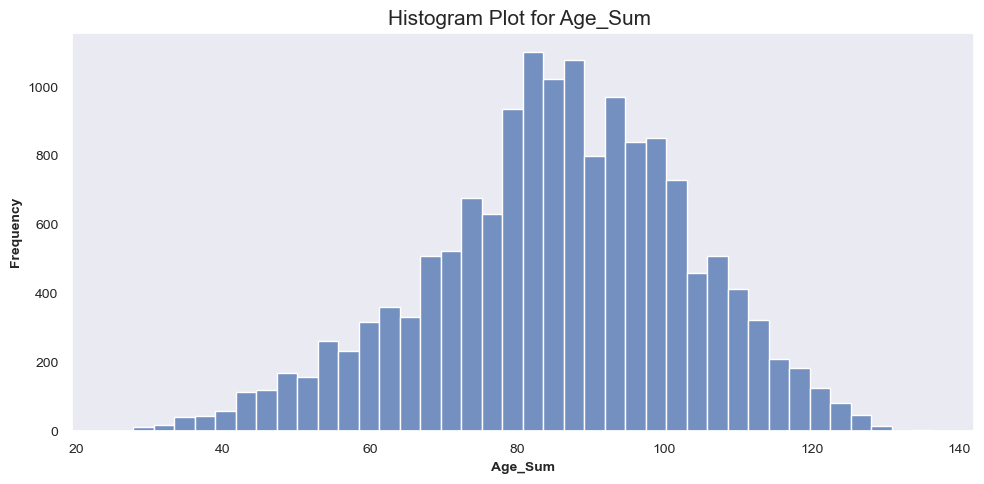

In [17]:
vi.histogramPlot(df, ['Age_Sum'], bins=40, KDE=False)

#### AntigenBW4_CAN & AntigenBW6_CAN
- AntigenBW4 and AntigenBW6 are serological specificities related to HLA-B alleles within the Human Leukocyte Antigen (HLA) system. These scores help to understand the degree of compatibility, where higher scores might reflect a stronger immune reactivity.

In [18]:
# add to feature
Features = df.columns[df.columns.str.contains('AntigenBW')].to_list()
Features

['AntigenBW4_CAN', 'AntigenBW6_CAN']

In [19]:
df[Features].corr(method='spearman')

,AntigenBW4_CAN,AntigenBW6_CAN
AntigenBW4_CAN,1.000000,0.892323
AntigenBW6_CAN,0.892323,1.000000


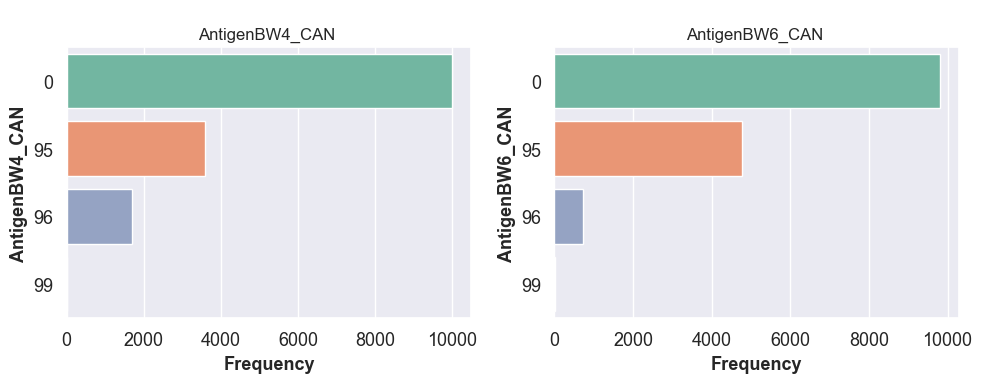

In [20]:
vi.categoricalFeaturesCountPlot(df, Features, figsize=(10, 4))

In [21]:
# new feature for Preserving the magnitude
df['AntigenBW_CAN_Sum'] = df.AntigenBW4_CAN + df.AntigenBW6_CAN

# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, Features)
df_can = uf.insertIntoDataFrame(df_can, ['AntigenBW_CAN_Sum'])
df_ordinal = uf.insertIntoDataFrame(df_ordinal, ['AntigenBW_CAN_Sum'])

#### AntigenC1_CAN & AntigenC2_CAN
- AntigenC1 and AntigenC2 represent specific alleles within the HLA-C locus on chromosome 6. These antigens play a role in immune response regulation and compatibility for organ transplantation. Compatibility or reactivity scores rather than simple presence/absence, where higher numbers could indicate stronger immune responses.

In [22]:
# add to feature
Features = df.columns[df.columns.str.contains('AntigenC')].to_list()
Features

['AntigenC1_CAN', 'AntigenC2_CAN']

In [23]:
df[Features].corr(method='spearman')

,AntigenC1_CAN,AntigenC2_CAN
AntigenC1_CAN,1.000000,0.896007
AntigenC2_CAN,0.896007,1.000000


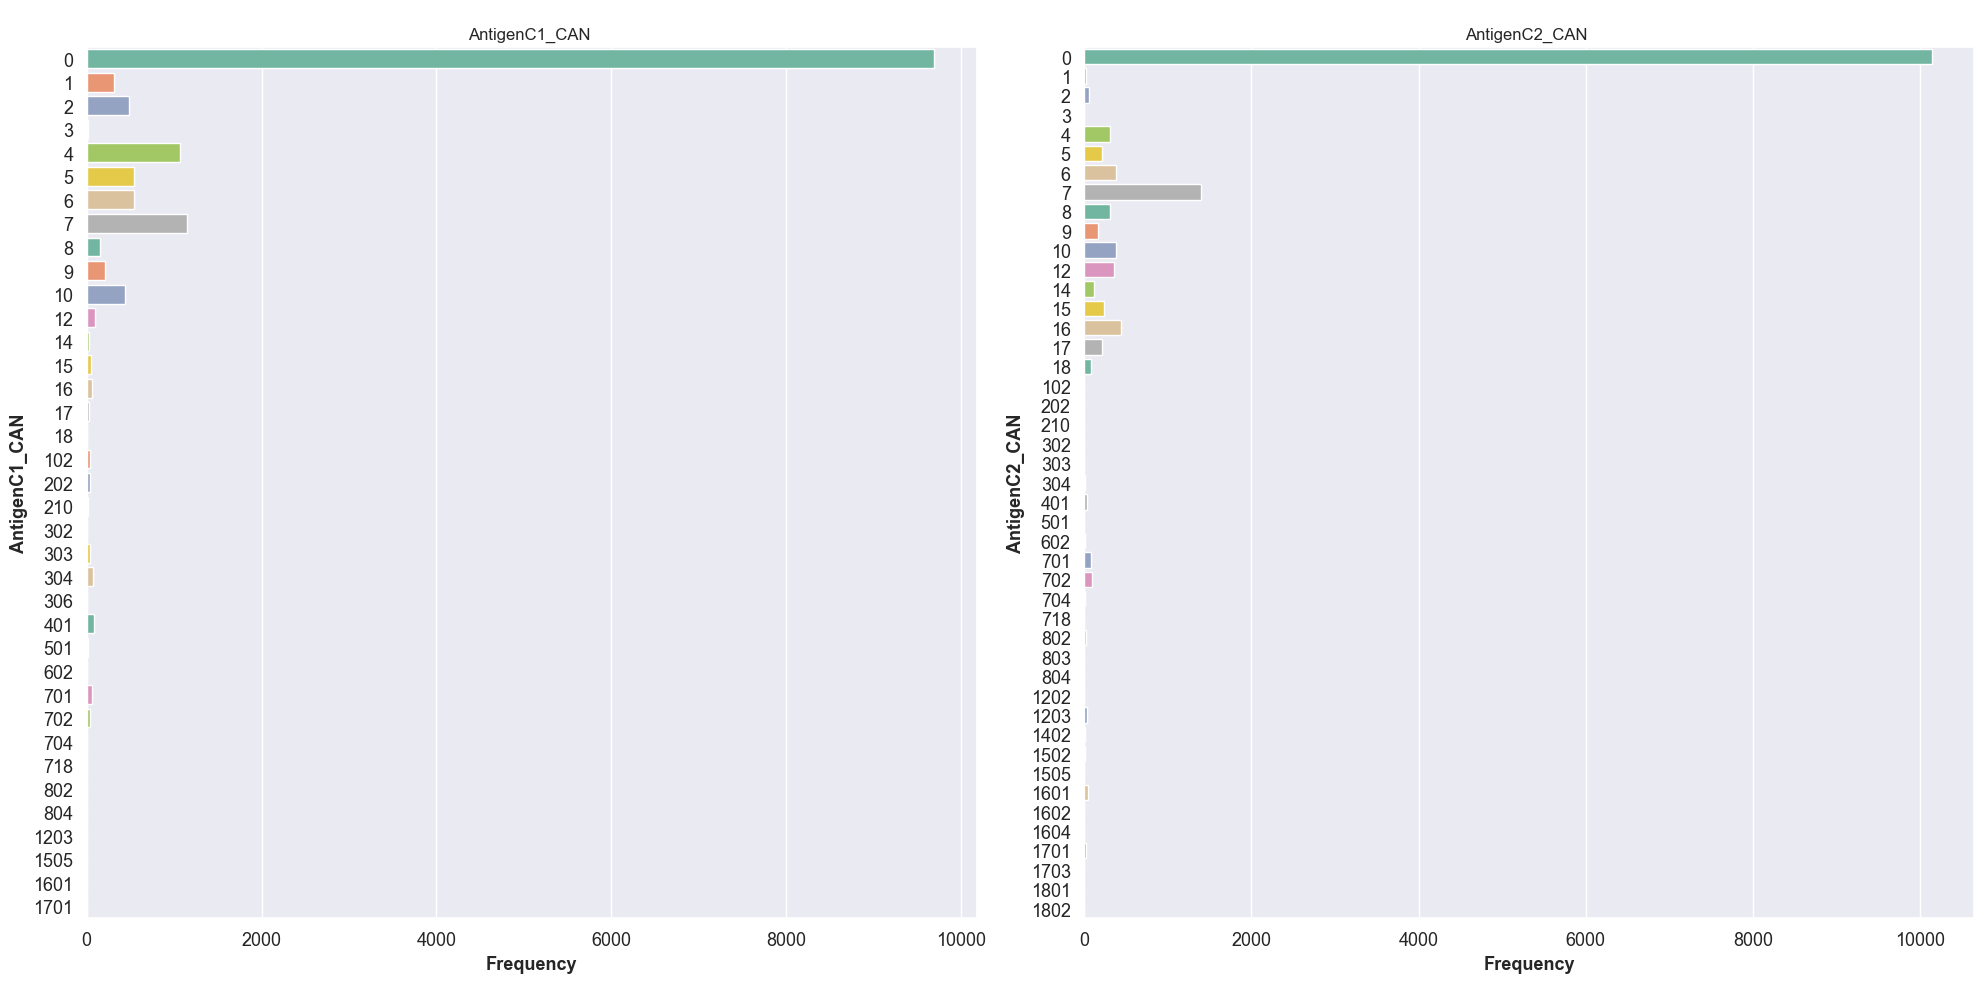

In [24]:
vi.categoricalFeaturesCountPlot(df, Features, txt='', figsize=(20, 10), tickFont=13, titleFont=12)

In [25]:
# new feature for Preserving the magnitude
df['AntigenC_CAN_Sum'] = df.AntigenC1_CAN + df.AntigenC2_CAN

# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, Features)
df_can = uf.insertIntoDataFrame(df_can, ['AntigenC_CAN_Sum'])
df_ordinal = uf.insertIntoDataFrame(df_ordinal, ['AntigenC_CAN_Sum'])

#### AntigenDQ1_CAN & AntigenDQ2_CAN
- AntigenDQ1 and AntigenDQ2 refer to alleles within the HLA-DQ locus of the Human Leukocyte Antigen (HLA) system, specifically HLA class II antigens, which are crucial for presenting peptides to the immune system, particularly to T-cells. 

In [26]:
# add to feature
Features = df.columns[df.columns.str.contains('AntigenDQ')].to_list()
Features

['AntigenDQ1_CAN', 'AntigenDQ2_CAN']

In [27]:
df[Features].corr(method='spearman')

,AntigenDQ1_CAN,AntigenDQ2_CAN
AntigenDQ1_CAN,1.000000,0.883757
AntigenDQ2_CAN,0.883757,1.000000


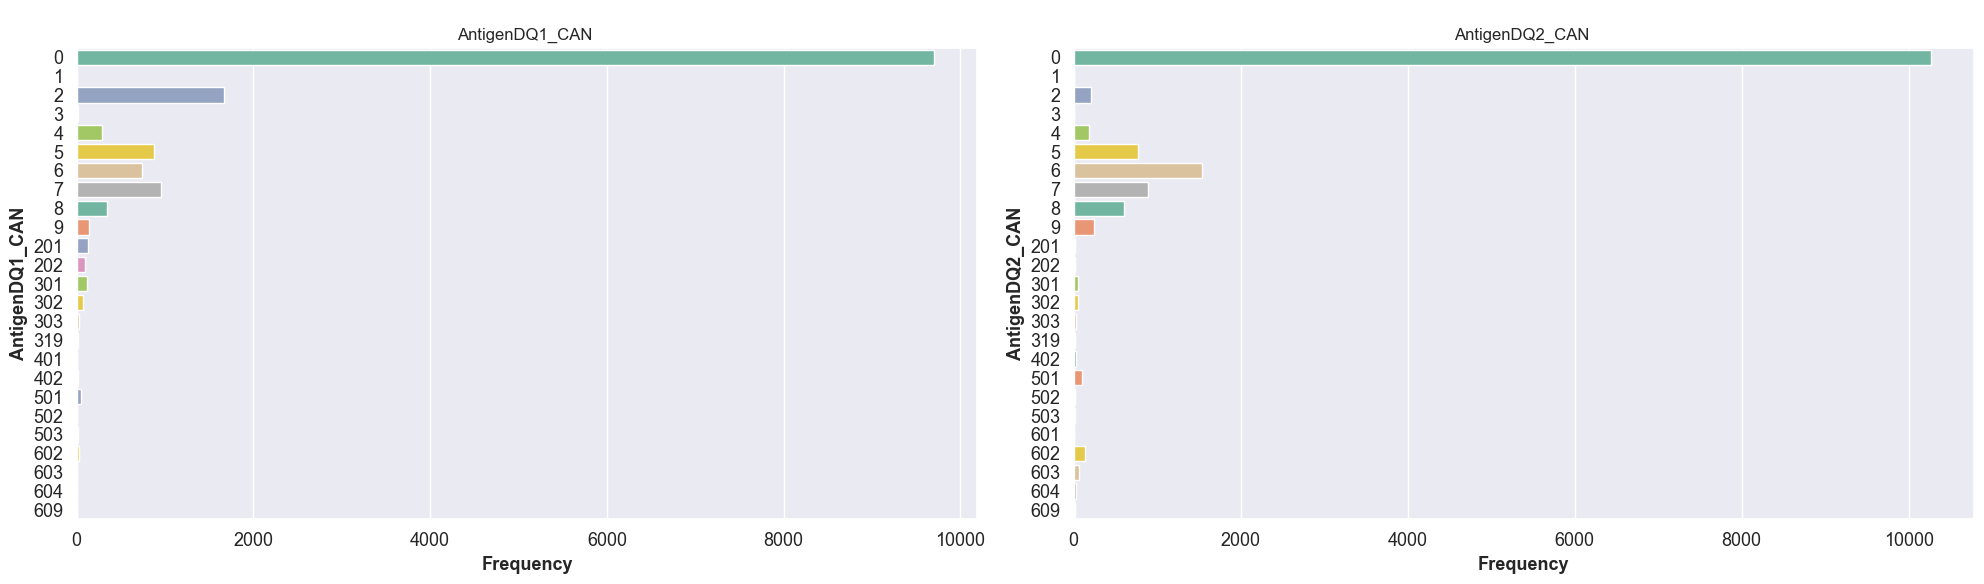

In [28]:
vi.categoricalFeaturesCountPlot(df, Features, txt='', figsize=(20, 6), tickFont=13, titleFont=12)

In [29]:
# new feature for Preserving the magnitude
df['AntigenDQ_CAN_Sum'] = df.AntigenDQ1_CAN + df.AntigenDQ2_CAN

# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, Features)
df_can = uf.insertIntoDataFrame(df_can, ['AntigenDQ_CAN_Sum'])
df_ordinal = uf.insertIntoDataFrame(df_ordinal, ['AntigenDQ_CAN_Sum'])

#### AntigenDR5
- AntigenDR5 is part of the HLA-DR antigen group within the HLA Class II system, specifically an allele of the HLA-DRB1 gene. HLA-DR antigens are molecules on the surface of antigen-presenting cells and play a central role in the immune response, particularly in recognizing foreign antigens and activating T-cells.

In [30]:
# add to feature
Features = df.columns[df.columns.str.contains('AntigenDR')].to_list()
Features

['AntigenDR51_CAN',
 'AntigenDR51_2_CAN',
 'AntigenDR52_CAN',
 'AntigenDR52_2_CAN',
 'AntigenDR53_CAN',
 'AntigenDR53_2_CAN']

In [31]:
df[Features].corr(method='spearman')

,AntigenDR51_CAN,AntigenDR51_2_CAN,AntigenDR52_CAN,AntigenDR52_2_CAN,AntigenDR53_CAN,AntigenDR53_2_CAN
AntigenDR51_CAN,1.000000,0.491760,0.875978,0.472340,0.894757,0.479232
AntigenDR51_2_CAN,0.491760,1.000000,0.444926,0.919532,0.468458,0.944074
AntigenDR52_CAN,0.875978,0.444926,1.000000,0.446083,0.862907,0.435516
AntigenDR52_2_CAN,0.472340,0.919532,0.446083,1.000000,0.456148,0.911466
AntigenDR53_CAN,0.894757,0.468458,0.862907,0.456148,1.000000,0.473240
AntigenDR53_2_CAN,0.479232,0.944074,0.435516,0.911466,0.473240,1.000000


In [32]:
# new feature for Preserving the magnitude
df['AntigenDR51_52_53_CAN_Sum'] = df.AntigenDR51_CAN + df.AntigenDR52_CAN + df.AntigenDR53_CAN
df['AntigenDR512_522_532_CAN_Sum'] = df.AntigenDR51_2_CAN + df.AntigenDR52_2_CAN + df.AntigenDR53_2_CAN

# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, Features)
df_can = uf.insertIntoDataFrame(df_can, ['AntigenDR51_52_53_CAN_Sum', 'AntigenDR512_522_532_CAN_Sum'])
df_ordinal = uf.insertIntoDataFrame(df_ordinal, ['AntigenDR51_52_53_CAN_Sum','AntigenDR512_522_532_CAN_Sum'])

#### AntigenHLAcompatibility

In [33]:
# add to feature
Features = df.columns[df.columns.str.contains('AntigenHLAcompatibility')].to_list()
Features

['AntigenHLAcompatibility_A1',
 'AntigenHLAcompatibility_A2',
 'AntigenHLAcompatibility_B1',
 'AntigenHLAcompatibility_B2',
 'AntigenHLAcompatibility_DR1',
 'AntigenHLAcompatibility_DR2']

- `AntigenHLAcompatibility_A` indicates the presence of certain HLA-A antigens in the donor or recipient. These antigens are crucial for matching donors and recipients in organ transplantation, as they can influence the likelihood of transplant rejection or acceptance.
- `AntigenHLAcompatibility_B` indicates the presence of specific HLA-B antigens in the donor or recipient. These antigens are essential for matching donors and recipients in organ transplantation, impacting the likelihood of transplant rejection or acceptance.
- `AntigenHLAcompatibility_DR` indicates the presence of specific HLA-DR antigens in the donor or recipient. Matching HLA-DR antigens is essential in organ transplantation as it can significantly influence the success of the transplant.

In [34]:
df_dict[df_dict.featureName.isin(Features)]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
230,AntigenHLAcompatibility_A1,RECIPIENT A1 ANTIGEN,RH,RECIPIENT HLA TYPING,Ordinal - NUM,Computed Recipient A1 Antigen,Unknown,"HLA proteins, known as markers, help the immune system identify which cells belong in your body and which do not. Sometimes called HLA matching, HLA typing can help identify when potential tissue donors are a good match for recipients. This improves the likelihood of a successful transplant. - {'RA1': 'AntigenHLAcompatibility_A1', 'RA2': 'AntigenHLAcompatibility_A2'} - NaNs"
231,AntigenHLAcompatibility_A2,RECIPIENT A2 ANTIGEN,RH,RECIPIENT HLA TYPING,Ordinal - NUM,Computed Recipient A2 Antigen,Unknown,"HLA proteins, known as markers, help the immune system identify which cells belong in your body and which do not. Sometimes called HLA matching, HLA typing can help identify when potential tissue donors are a good match for recipients. This improves the likelihood of a successful transplant. - {'RA1': 'AntigenHLAcompatibility_A1', 'RA2': 'AntigenHLAcompatibility_A2'} - NaNs"
232,AntigenHLAcompatibility_B1,RECIPIENT B1 ANTIGEN,RH,RECIPIENT HLA TYPING,Ordinal - NUM,Computed Recipient B1 Antigen,Unknown,"HLA proteins, known as markers, help the immune system identify which cells belong in your body and which do not. Sometimes called HLA matching, HLA typing can help identify when potential tissue donors are a good match for recipients. This improves the likelihood of a successful transplant. - {'RB1': 'AntigenHLAcompatibility_B1', 'RB2': 'AntigenHLAcompatibility_B2'} - NaNs"
233,AntigenHLAcompatibility_B2,RECIPIENT B2 ANTIGEN,RH,RECIPIENT HLA TYPING,Ordinal - NUM,Computed Recipient B2 Antigen,Unknown,"HLA proteins, known as markers, help the immune system identify which cells belong in your body and which do not. Sometimes called HLA matching, HLA typing can help identify when potential tissue donors are a good match for recipients. This improves the likelihood of a successful transplant. - {'RB1': 'AntigenHLAcompatibility_B1', 'RB2': 'AntigenHLAcompatibility_B2'} - NaNs"
234,AntigenHLAcompatibility_DR1,RECIPIENT DR1 ANTIGEN,RH,RECIPIENT HLA TYPING,Ordinal - NUM,Computed Recipient DR1 Antigen,Unknown,"HLA proteins, known as markers, help the immune system identify which cells belong in your body and which do not. Sometimes called HLA matching, HLA typing can help identify when potential tissue donors are a good match for recipients. This improves the likelihood of a successful transplant. - {'RDR1': 'AntigenHLAcompatibility_DR1', 'RDR2': 'AntigenHLAcompatibility_DR2'} - NaNs"
235,AntigenHLAcompatibility_DR2,RECIPIENT DR2 ANTIGEN,RH,RECIPIENT HLA TYPING,Ordinal - NUM,Computed Recipient DR2 Antigen,Unknown,"HLA proteins, known as markers, help the immune system identify which cells belong in your body and which do not. Sometimes called HLA matching, HLA typing can help identify when potential tissue donors are a good match for recipients. This improves the likelihood of a successful transplant. - {'RDR1': 'AntigenHLAcompatibility_DR1', 'RDR2': 'AntigenHLAcompatibility_DR2'} - NaNs"


In [35]:
df[Features].corr(method='spearman')

,AntigenHLAcompatibility_A1,AntigenHLAcompatibility_A2,AntigenHLAcompatibility_B1,AntigenHLAcompatibility_B2,AntigenHLAcompatibility_DR1,AntigenHLAcompatibility_DR2
AntigenHLAcompatibility_A1,1.000000,0.539783,0.393834,0.267552,0.183310,0.173523
AntigenHLAcompatibility_A2,0.539783,1.000000,0.335482,0.288780,0.177364,0.196257
AntigenHLAcompatibility_B1,0.393834,0.335482,1.000000,0.367374,0.106032,0.060624
AntigenHLAcompatibility_B2,0.267552,0.288780,0.367374,1.000000,0.119760,0.150173
AntigenHLAcompatibility_DR1,0.183310,0.177364,0.106032,0.119760,1.000000,0.319152
AntigenHLAcompatibility_DR2,0.173523,0.196257,0.060624,0.150173,0.319152,1.000000


In [36]:
df[Features].describe().T

,count,mean,std,min,25%,50%,75%,max
AntigenHLAcompatibility_A1,14198.0,61.416608,375.966384,0.0,2.0,2.0,23.0,6802.0
AntigenHLAcompatibility_A2,14198.0,184.819341,824.527979,0.0,11.0,30.0,68.0,6802.0
AntigenHLAcompatibility_B1,14198.0,184.378927,684.915134,0.0,8.0,35.0,53.0,5703.0
AntigenHLAcompatibility_B2,14198.0,277.686223,967.502170,0.0,44.0,52.0,61.0,5703.0
AntigenHLAcompatibility_DR1,14198.0,51.196436,281.512399,0.0,4.0,8.0,13.0,10300.0
AntigenHLAcompatibility_DR2,14198.0,92.077194,323.090090,0.0,11.0,13.0,15.0,10300.0


##### The Mann-Whitney U test has several key assumptions:
- Independent observations: The observations within and between groups must be independent of each other.
- Ordinal or continuous dependent variable: The variable being measured should be at least ordinal, meaning it can be ranked.
- Independent groups: The test compares two categorical, independent groups12.
- Random sampling: The data should come from a random sample of the population2.
- Similar distribution shapes: For interpreting differences in medians, the distributions of both groups should have a similar shape.
- Sufficient sample size: Generally, more than 5 values in each group, though this can vary based on the expected difference between group

#### Hypotheses:
- Null hypothesis (H$_0$): The two populations are equal.
- Alternative hypothesis (H$_1$): The two populations are not equal.

In [37]:
# Mann-Whitney U test
results = uf.mannwhitneyu_combinations(df, Features)

Features: AntigenHLAcompatibility_A1 vs AntigenHLAcompatibility_A2, U-statistic: 46,177,106.0, P-value: 0.00000
Features: AntigenHLAcompatibility_A1 vs AntigenHLAcompatibility_B1, U-statistic: 38,397,906.0, P-value: 0.00000
Features: AntigenHLAcompatibility_A1 vs AntigenHLAcompatibility_B2, U-statistic: 22,791,511.0, P-value: 0.00000
Features: AntigenHLAcompatibility_A1 vs AntigenHLAcompatibility_DR1, U-statistic: 78,167,898.0, P-value: 0.00000
Features: AntigenHLAcompatibility_A1 vs AntigenHLAcompatibility_DR2, U-statistic: 58,521,719.5, P-value: 0.00000
Features: AntigenHLAcompatibility_A2 vs AntigenHLAcompatibility_B1, U-statistic: 94,046,870.0, P-value: 0.00000
Features: AntigenHLAcompatibility_A2 vs AntigenHLAcompatibility_B2, U-statistic: 60,291,231.0, P-value: 0.00000
Features: AntigenHLAcompatibility_A2 vs AntigenHLAcompatibility_DR1, U-statistic: 150,162,612.0, P-value: 0.00000
Features: AntigenHLAcompatibility_A2 vs AntigenHLAcompatibility_DR2, U-statistic: 135,669,162.5, P-v

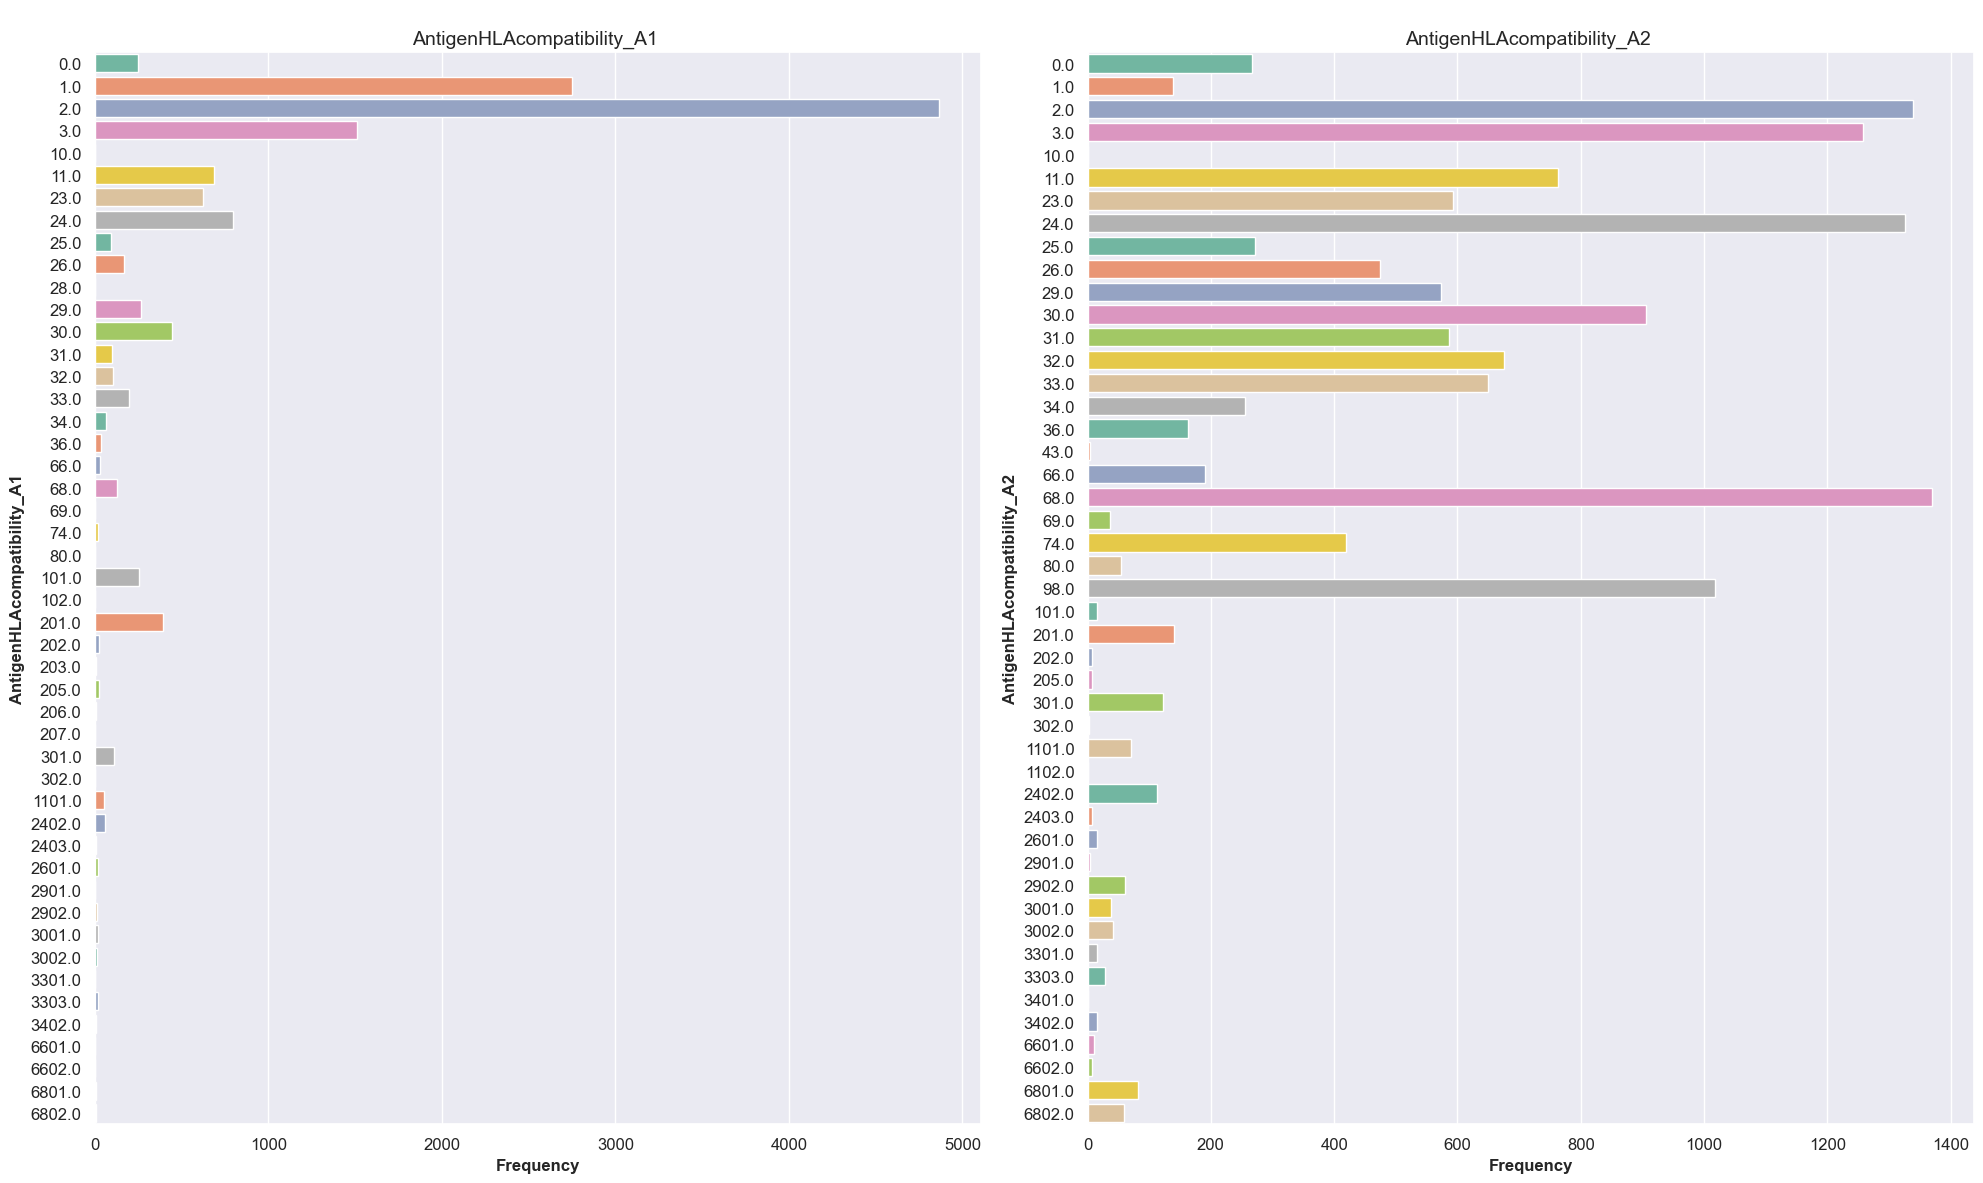

In [38]:
# plot AntigenHLAcompatibility_A1
vi.categoricalFeaturesCountPlot(df, ['AntigenHLAcompatibility_A1','AntigenHLAcompatibility_A2'], txt='', figsize=(20, 12), tickFont=12, titleFont=14)

#### AntigenHistocompatibility

In [39]:
# add to feature
Features = df.columns[df.columns.str.contains('AntigenHistocompatibility')].to_list()
Features

['AntigenHistocompatibility_DA1_DON',
 'AntigenHistocompatibility_DA2_DON',
 'AntigenHistocompatibility_B1_DON',
 'AntigenHistocompatibility_B2_DON',
 'AntigenHistocompatibility_DR1_DON',
 'AntigenHistocompatibility_DR2_DON']

In [40]:
df_dict[df_dict.featureName.isin(Features)]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
46,AntigenHistocompatibility_DA1_DON,DONOR A1 ANTIGEN,CALCULATED,DONOR CENTER HISTOCOMPATIBILITY TYPING,Ordinal - NUM,COMPUTED DONOR A1 ANTIGEN,Unknown,"Histocompatibility testing is most relevant for topics related to whole organ, tissue, or stem cell transplants, where the similarity or difference between the donor's HLA alleles and the recipient's triggers the immune system to reject the transplant. - {'DA1_DON': 'AntigenHistocompatibility_DA1_DON', 'DA2_DON': 'AntigenHistocompatibility_DA2_DON'} - NaNs"
47,AntigenHistocompatibility_DA2_DON,DONOR A2 ANTIGEN,CALCULATED,DONOR CENTER HISTOCOMPATIBILITY TYPING,Ordinal - NUM,COMPUTED DONOR A2 ANTIGEN,Unknown,"Histocompatibility testing is most relevant for topics related to whole organ, tissue, or stem cell transplants, where the similarity or difference between the donor's HLA alleles and the recipient's triggers the immune system to reject the transplant. - {'DA1_DON': 'AntigenHistocompatibility_DA1_DON', 'DA2_DON': 'AntigenHistocompatibility_DA2_DON'} - NaNs"
58,AntigenHistocompatibility_B1_DON,DONOR B1 ANTIGEN,CALCULATED,DONOR CENTER HISTOCOMPATIBILITY TYPING,Ordinal - NUM,COMPUTED DONOR B1 ANTIGEN,Unknown,"Histocompatibility testing is most relevant for topics related to whole organ, tissue, or stem cell transplants, where the similarity or difference between the donor's HLA alleles and the recipient's triggers the immune system to reject the transplant. - {'DB1_DON': 'AntigenHistocompatibility_B1_DON', 'DB2_DON': 'AntigenHistocompatibility_B2_DON'} - NaNs"
59,AntigenHistocompatibility_B2_DON,DONOR B2 ANTIGEN,CALCULATED,DONOR CENTER HISTOCOMPATIBILITY TYPING,Ordinal - NUM,COMPUTED DONOR B2 ANTIGEN,Unknown,"Histocompatibility testing is most relevant for topics related to whole organ, tissue, or stem cell transplants, where the similarity or difference between the donor's HLA alleles and the recipient's triggers the immune system to reject the transplant. - {'DB1_DON': 'AntigenHistocompatibility_B1_DON', 'DB2_DON': 'AntigenHistocompatibility_B2_DON'} - NaNs"
61,AntigenHistocompatibility_DR1_DON,DONOR DR1 ANTIGEN,CALCULATED,DONOR CENTER HISTOCOMPATIBILITY TYPING,Ordinal - NUM,COMPUTED DONOR DR1 ANTIGEN,Unknown,"Histocompatibility testing is most relevant for topics related to whole organ, tissue, or stem cell transplants, where the similarity or difference between the donor's HLA alleles and the recipient's triggers the immune system to reject the transplant. - {'DDR1_DON': 'AntigenHistocompatibility_DR1_DON', 'DDR2_DON': 'AntigenHistocompatibility_DR2_DON'} - NaNs"
62,AntigenHistocompatibility_DR2_DON,DONOR DR2 ANTIGEN,CALCULATED,DONOR CENTER HISTOCOMPATIBILITY TYPING,Ordinal - NUM,COMPUTED DONOR DR2 ANTIGEN,Unknown,"Histocompatibility testing is most relevant for topics related to whole organ, tissue, or stem cell transplants, where the similarity or difference between the donor's HLA alleles and the recipient's triggers the immune system to reject the transplant. - {'DDR1_DON': 'AntigenHistocompatibility_DR1_DON', 'DDR2_DON': 'AntigenHistocompatibility_DR2_DON'} - NaNs"


In [41]:
df[Features].corr(method='spearman')

,AntigenHistocompatibility_DA1_DON,AntigenHistocompatibility_DA2_DON,AntigenHistocompatibility_B1_DON,AntigenHistocompatibility_B2_DON,AntigenHistocompatibility_DR1_DON,AntigenHistocompatibility_DR2_DON
AntigenHistocompatibility_DA1_DON,1.000000,0.473285,0.201411,0.112818,-0.020047,0.006619
AntigenHistocompatibility_DA2_DON,0.473285,1.000000,0.208212,0.163008,0.037127,0.034949
AntigenHistocompatibility_B1_DON,0.201411,0.208212,1.000000,0.247993,-0.087919,-0.145848
AntigenHistocompatibility_B2_DON,0.112818,0.163008,0.247993,1.000000,-0.015763,0.014141
AntigenHistocompatibility_DR1_DON,-0.020047,0.037127,-0.087919,-0.015763,1.000000,0.218641
AntigenHistocompatibility_DR2_DON,0.006619,0.034949,-0.145848,0.014141,0.218641,1.000000


#### Hypotheses:
- Null hypothesis (H0): The two populations are equal.
- Alternative hypothesis (H1): The two populations are not equal.

In [42]:
# Mann-Whitney U test
results = uf.mannwhitneyu_combinations(df, Features)

Features: AntigenHistocompatibility_DA1_DON vs AntigenHistocompatibility_DA2_DON, U-statistic: 39,470,400.0, P-value: 0.00000
Features: AntigenHistocompatibility_DA1_DON vs AntigenHistocompatibility_B1_DON, U-statistic: 28,047,038.0, P-value: 0.00000
Features: AntigenHistocompatibility_DA1_DON vs AntigenHistocompatibility_B2_DON, U-statistic: 9,195,887.0, P-value: 0.00000
Features: AntigenHistocompatibility_DA1_DON vs AntigenHistocompatibility_DR1_DON, U-statistic: 79,058,936.5, P-value: 0.00000
Features: AntigenHistocompatibility_DA1_DON vs AntigenHistocompatibility_DR2_DON, U-statistic: 50,756,503.0, P-value: 0.00000
Features: AntigenHistocompatibility_DA2_DON vs AntigenHistocompatibility_B1_DON, U-statistic: 105,062,039.0, P-value: 0.00000
Features: AntigenHistocompatibility_DA2_DON vs AntigenHistocompatibility_B2_DON, U-statistic: 58,328,280.0, P-value: 0.00000
Features: AntigenHistocompatibility_DA2_DON vs AntigenHistocompatibility_DR1_DON, U-statistic: 178,922,369.5, P-value: 0.0

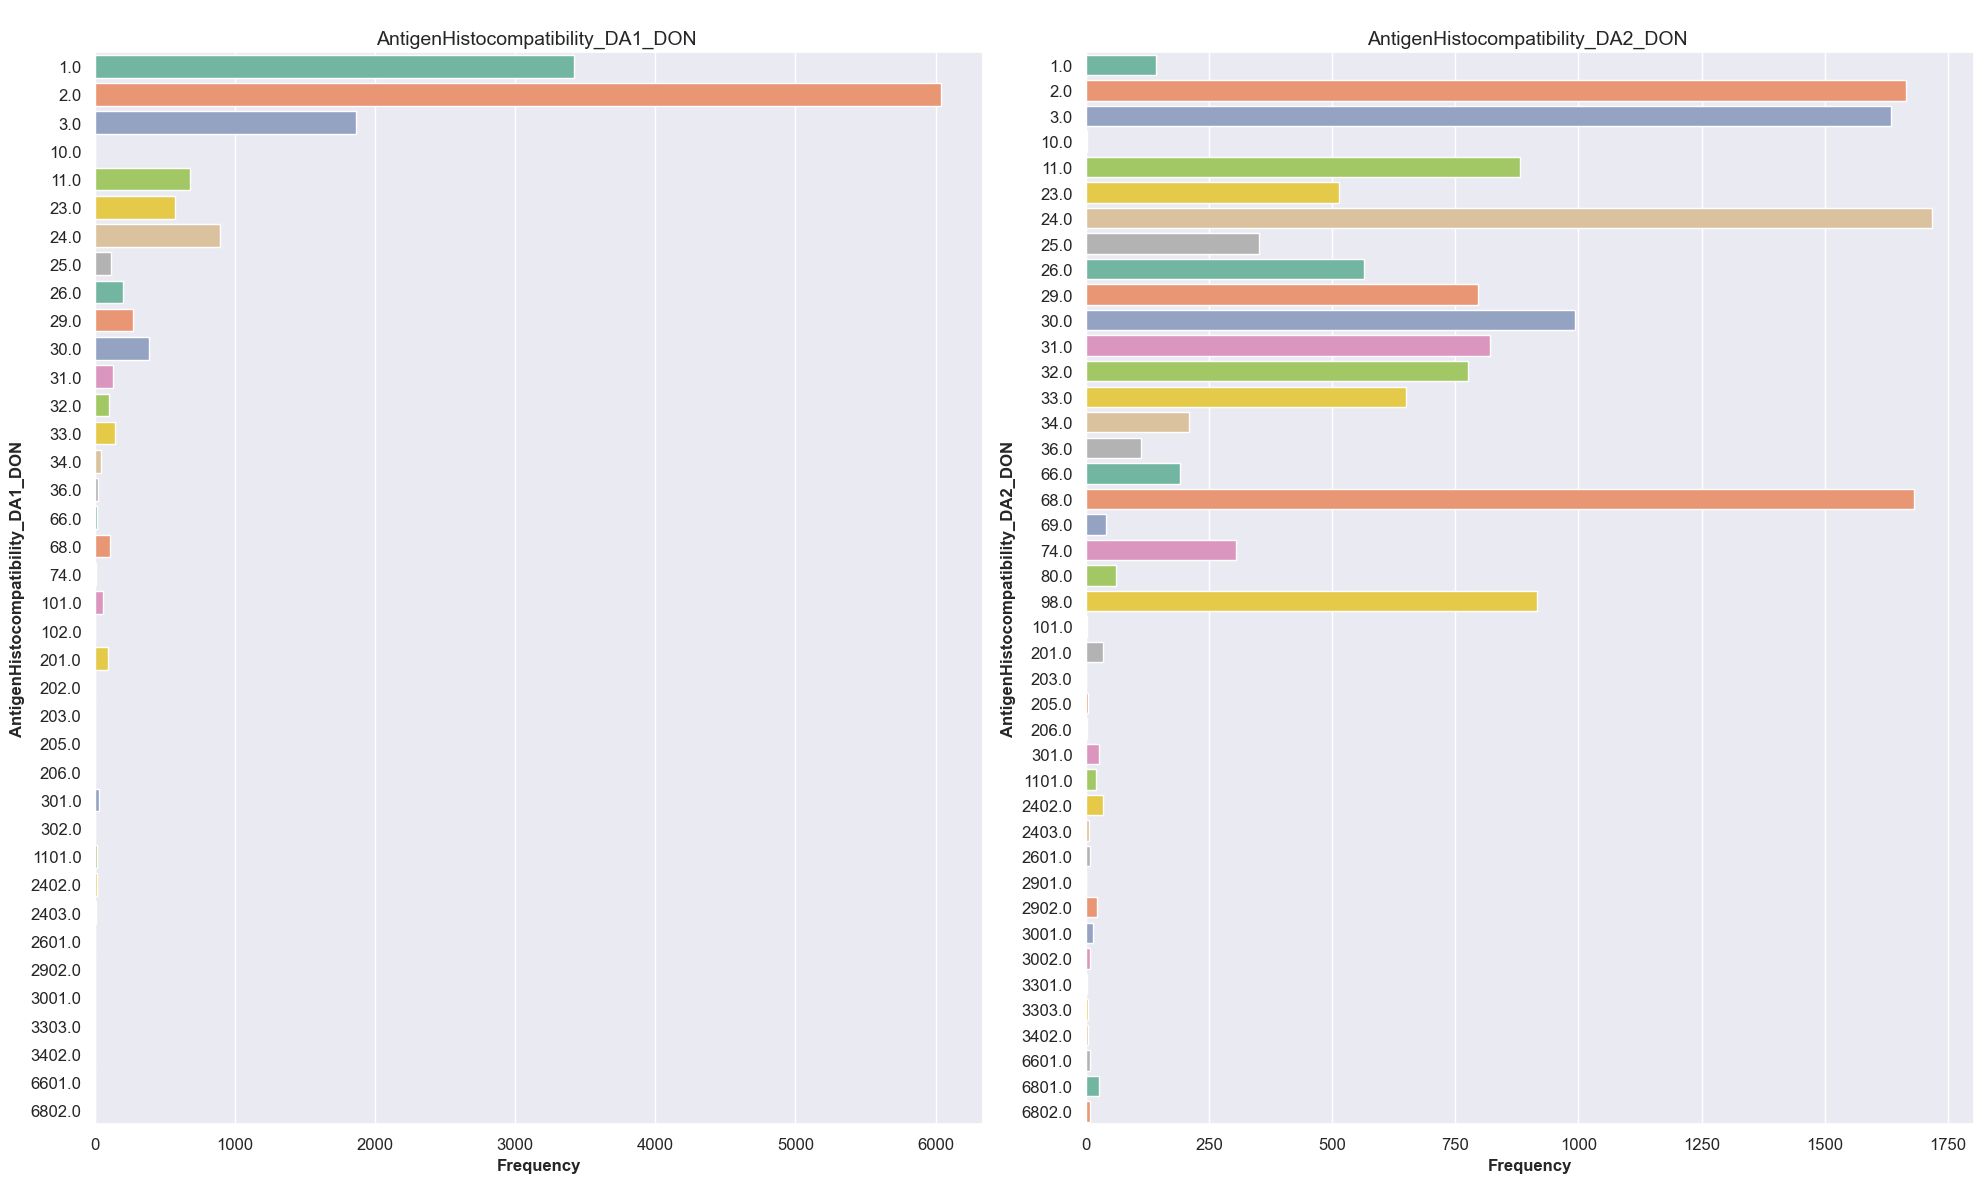

In [43]:
# plot AntigenHLAcompatibility_A1
vi.categoricalFeaturesCountPlot(df, ['AntigenHistocompatibility_DA1_DON','AntigenHistocompatibility_DA2_DON'], txt='', figsize=(20, 12), tickFont=12, titleFont=14)

#### BMI & Weight & Height

In [44]:
Features = ['BMI_CAN','BMI_DON','HeightCm_CAN','HeightCm_DON','WeightKg_CAN','WeightKg_DON']

In [45]:
df[Features].corr(method='pearson')

,BMI_CAN,BMI_DON,HeightCm_CAN,HeightCm_DON,WeightKg_CAN,WeightKg_DON
BMI_CAN,1.000000,0.241010,0.085040,0.213224,0.845356,0.322803
BMI_DON,0.241010,1.000000,0.136550,-0.108589,0.266950,0.879204
HeightCm_CAN,0.085040,0.136550,1.000000,0.523433,0.592491,0.370007
HeightCm_DON,0.213224,-0.108589,0.523433,1.000000,0.444517,0.365413
WeightKg_CAN,0.845356,0.266950,0.592491,0.444517,1.000000,0.456497
WeightKg_DON,0.322803,0.879204,0.370007,0.365413,0.456497,1.000000


In [46]:
# new feature for Preserving the magnitude
df['HeightCm_Sum'] = df[['HeightCm_CAN', 'HeightCm_DON']].sum(axis=1)
df['WeightKg_Sum'] = df[['WeightKg_CAN', 'WeightKg_DON']].sum(axis=1)

# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, Features)
df_both = uf.insertIntoDataFrame(df_both, ['HeightCm_Sum', 'WeightKg_Sum'])

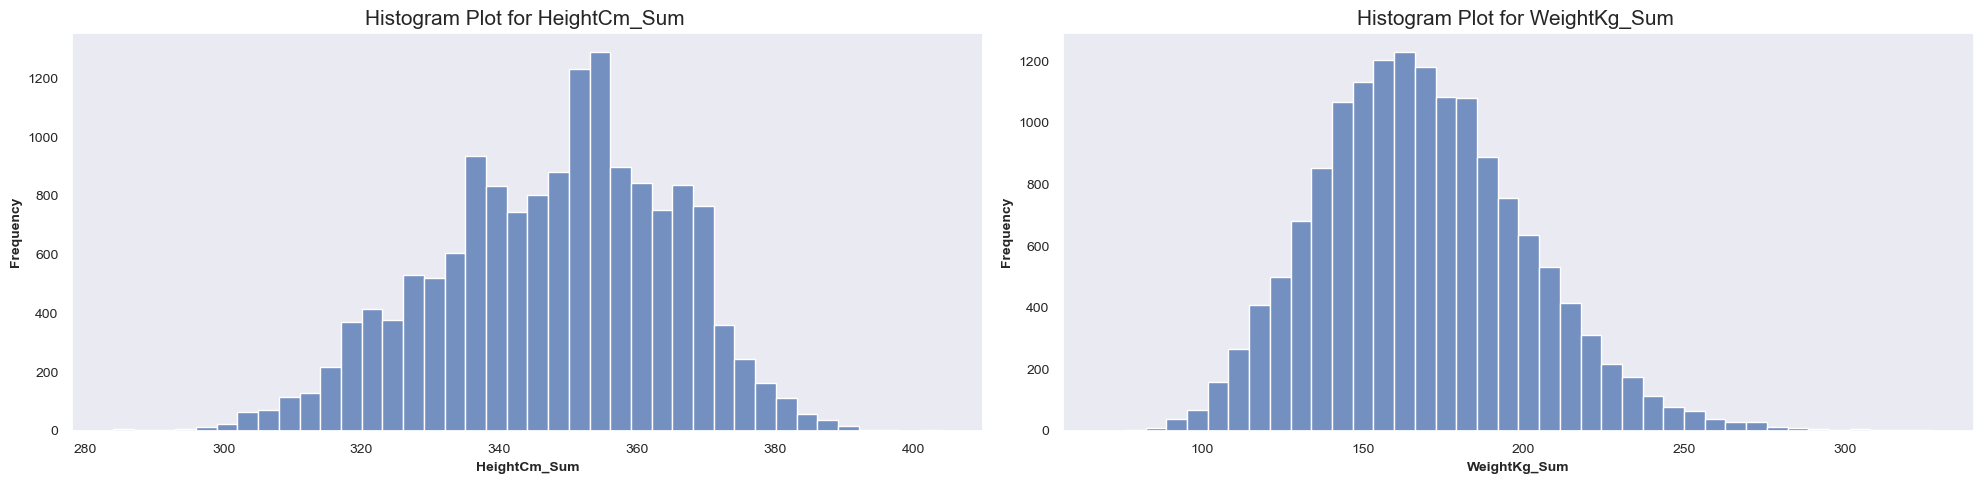

In [47]:
vi.histogramPlot(df, ['HeightCm_Sum', 'WeightKg_Sum'], bins=40, KDE=False)

#### BloodUreaNitrogenLevel_DON

In [48]:
Features = ['BloodUreaNitrogenLevel_DON']

In [49]:
df[Features].describe().T

,count,mean,std,min,25%,50%,75%,max
BloodUreaNitrogenLevel_DON,15095.0,27.344747,22.139277,1.0,14.0,21.0,32.0,250.0


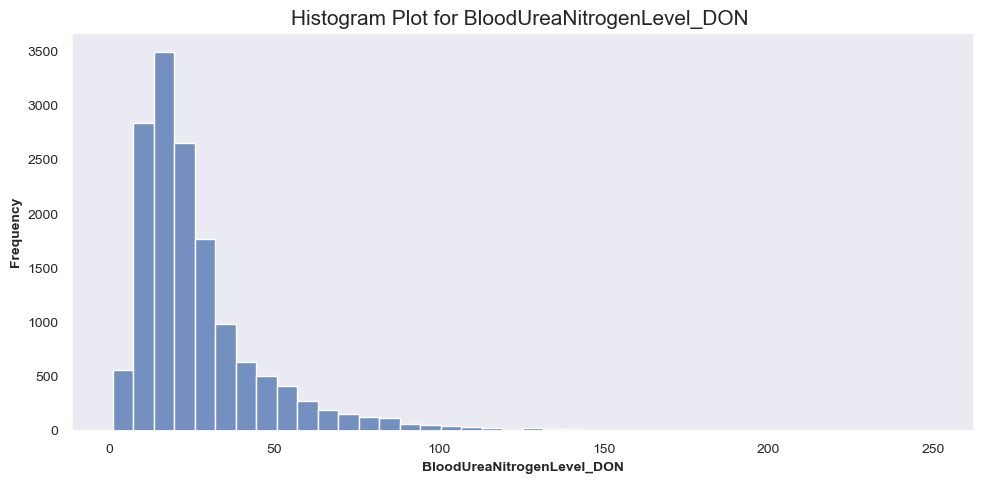

In [50]:
vi.histogramPlot(df, ['BloodUreaNitrogenLevel_DON'], bins=40, KDE=False)

#### CPRA

#### [PanelReactiveAntibody](https://www.sciencedirect.com/science/article/pii/S0003497507012179?casa_token=XXwcNbRErZgAAAAA:S5x7ktxVUm7UvVJ5xcf8vSCGVIFK3jyUt-tpYAOeYzfkdFyuwsDLRt4_hhc55be5x7Sd9oRxxp5u%5D)

- The Panel Reactive Antibody (PRA), or Calculated Panel Reactive Antibody (cPRA), is a metric used in organ transplantation.
    - cPRA = 0%: The recipient is unlikely to have antibodies against most potential donors and is considered less "sensitized," meaning they have a broad range of compatible donor options.
    - Higher cPRA (e.g., 80%+): The recipient has a high level of sensitization, reducing the likelihood of finding compatible donors.
    - cPRA = 100%: The recipient has antibodies against nearly all potential donors, making finding a compatible organ highly challenging.

- CPRA values typically range from 0% to 100%.
    - The results are often grouped into categories, such as:
        - 0%       No Sensitization
        - 1-10%    Low Sensitization
        - 11-25%   Moderate Sensitization
        - 26-100%   High Sensitization

#### User Function(s)

In [51]:
def categorizePercentage(value):
    """
    Define the function for mapping
    """
    if value == 0:
        return "No Sensitization"
    elif 1 <= value <= 10:
        return "Low Sensitization"
    elif 11 <= value <= 25:
        return "Moderate Sensitization"
    elif 26 <= value <= 100:
        return "High Sensitization"
    else:
        return "Unknown"

In [52]:
# add to feature
Features = df.columns[df.columns.str.contains('CPRA')].to_list()
Features

['CPRA_Recent', 'CPRA_Peak']

In [53]:
df[Features].describe().T

,count,mean,std,min,25%,50%,75%,max
CPRA_Recent,11537.0,11.443876,23.749728,0.0,0.0,0.0,7.0,100.0
CPRA_Peak,11522.0,15.457820,27.054944,0.0,0.0,0.0,21.0,100.0


In [54]:
# Kendall Tau Correlation - Evaluates the ordinal association between variables based on the ranks of the data rather than their actual values.
df[Features].corr(method='kendall')

,CPRA_Recent,CPRA_Peak
CPRA_Recent,1.000000,0.820563
CPRA_Peak,0.820563,1.000000


In [55]:
# new feature for PanelReactiveAntibody_CPRA_CAN
df['CalculatedPanelReactiveAntibody_CPRA_CAN_Mean'] = df[['CPRA_Peak','CPRA_Recent']].mean(axis=1)

# update PanelReactiveAntibody_CPRA_CAN with non-NaN values from Peak_CPRA and Recent_CPRA
df['CalculatedPanelReactiveAntibody_CPRA_CAN_Mean'] = df['CalculatedPanelReactiveAntibody_CPRA_CAN_Mean'].fillna(df['CPRA_Peak'].combine_first(df['CPRA_Recent']))

In [56]:
df[['CPRA_Peak', 'CPRA_Recent', 'CalculatedPanelReactiveAntibody_CPRA_CAN_Mean']].sample(10)

,CPRA_Peak,CPRA_Recent,CalculatedPanelReactiveAntibody_CPRA_CAN_Mean
12439,0.0,0.0,0.0
14158,41.0,41.0,41.0
14027,0.0,0.0,0.0
2673,0.0,0.0,0.0
6539,95.0,95.0,95.0
8431,0.0,0.0,0.0
11896,13.0,0.0,6.5
11317,NaN,NaN,NaN
6505,NaN,NaN,NaN
1199,NaN,NaN,NaN


In [57]:
df[['CPRA_Peak', 'CPRA_Recent', 'CalculatedPanelReactiveAntibody_CPRA_CAN_Mean']].isna().sum()

CPRA_Peak                                        3762
CPRA_Recent                                      3747
CalculatedPanelReactiveAntibody_CPRA_CAN_Mean    3741
dtype: int64

In [58]:
# get indices
rowIdx = df[(~df.CPRA_Recent.isna() & df.CPRA_Peak.isna())].index

# column indices or can find them using the column names
colIdx = [df.columns.get_loc(col) for col in ['CPRA_Peak', 'CPRA_Recent', 'CalculatedPanelReactiveAntibody_CPRA_CAN_Mean']]

# display
df.iloc[rowIdx, colIdx].sample(5)

,CPRA_Peak,CPRA_Recent,CalculatedPanelReactiveAntibody_CPRA_CAN_Mean
976,NaN,0.0,0.0
9504,NaN,0.0,0.0
13543,NaN,0.0,0.0
1050,NaN,0.0,0.0
3863,NaN,0.0,0.0


In [59]:
# get indices
rowIdx = df[(df.CPRA_Recent.isna() & ~df.CPRA_Peak.isna())].index

# column indices or can find them using the column names
colIdx = [df.columns.get_loc(col) for col in ['CPRA_Peak', 'CPRA_Recent', 'CalculatedPanelReactiveAntibody_CPRA_CAN_Mean']]

# display
df.iloc[rowIdx, colIdx].sample(5)

,CPRA_Peak,CPRA_Recent,CalculatedPanelReactiveAntibody_CPRA_CAN_Mean
5684,18.0,NaN,18.0
4269,60.0,NaN,60.0
3624,80.0,NaN,80.0
1270,86.0,NaN,86.0
14541,67.0,NaN,67.0


In [60]:
# convert to categorical variable
df['CalculatedPanelReactiveAntibody_CPRA_CAN_Mean'] = df['CalculatedPanelReactiveAntibody_CPRA_CAN_Mean'].apply(categorizePercentage).astype('category')

# value counts
print(df['CalculatedPanelReactiveAntibody_CPRA_CAN_Mean'].value_counts(dropna=False))
print("\n")

# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, Features)
df_can = uf.insertIntoDataFrame(df_can, ['CalculatedPanelReactiveAntibody_CPRA_CAN_Mean'])
df_ordinal = uf.insertIntoDataFrame(df_ordinal, ['CalculatedPanelReactiveAntibody_CPRA_CAN_Mean'])

CalculatedPanelReactiveAntibody_CPRA_CAN_Mean
No Sensitization          6900
Unknown                   3813
High Sensitization        2253
Low Sensitization         1282
Moderate Sensitization    1036
Name: count, dtype: int64




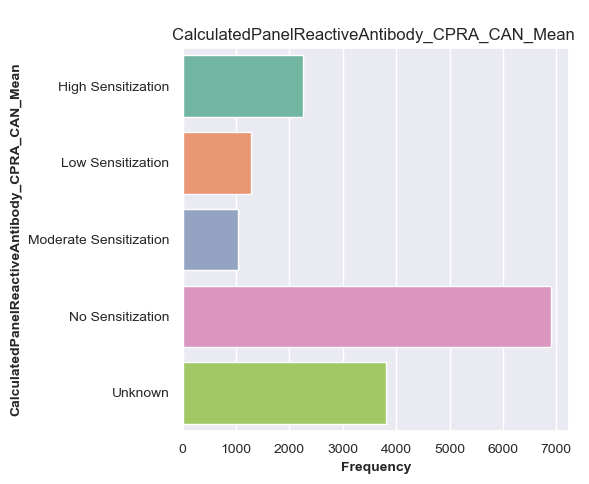

In [61]:
# plot CalculatedPanelReactiveAntibody_CPRA_CAN
vi.categoricalFeaturesCountPlot(df, ['CalculatedPanelReactiveAntibody_CPRA_CAN_Mean'], txt='', figsize=(10, 5), tickFont=10, titleFont=12)

#### Creatinine

In [62]:
# add to feature
Features = df.columns[df.columns.str.contains('Creatinine')].to_list()
Features

['CreatinineListing_CAN', 'CreatinineTransplant_CAN', 'Creatinine_DON']

In [63]:
df[Features].describe().T

,count,mean,std,min,25%,50%,75%,max
CreatinineListing_CAN,15284.0,1.393200,1.039604,0.08,0.96,1.2,1.50,24.00
CreatinineTransplant_CAN,15284.0,1.380336,1.014748,0.06,0.96,1.2,1.50,25.68
Creatinine_DON,15284.0,1.579822,1.674119,0.04,0.76,1.0,1.52,17.89


In [64]:
df[Features].corr(method='pearson')

,CreatinineListing_CAN,CreatinineTransplant_CAN,Creatinine_DON
CreatinineListing_CAN,1.000000,0.724502,-0.044745
CreatinineTransplant_CAN,0.724502,1.000000,-0.035274
Creatinine_DON,-0.044745,-0.035274,1.000000


In [65]:
# new feature
df['Creatinine_Sum'] = (df[['CreatinineListing_CAN', 'CreatinineTransplant_CAN']].mean(axis=1)) + df.Creatinine_DON

# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, Features)
df_both = uf.insertIntoDataFrame(df_both, ['Creatinine_Sum'])

#### DistanceFromDonorHospitaltoTXCenter

In [66]:
# add to feature
Features = df.columns[df.columns.str.contains('DistanceFromDonor')].to_list()
Features

['DistanceFromDonorHospitaltoTXCenter']

In [67]:
df[Features].describe().T

,count,mean,std,min,25%,50%,75%,max
DistanceFromDonorHospitaltoTXCenter,15284.0,231.295014,228.778193,0.0,41.0,177.0,361.0,2215.0


#### Hematocrit_DON

In [68]:
# add to feature
Features = df.columns[df.columns.str.contains('Hematocrit')].to_list()
Features

['Hematocrit_DON']

In [69]:
df[Features].describe().T

,count,mean,std,min,25%,50%,75%,max
Hematocrit_DON,15095.0,28.098052,4.935037,2.3,24.7,27.5,31.0,75.0


#### Hemodynamics
- blood flow and the forces involved in circulation within the cardiovascular system

#### Note: 
- Hemodynamics_SYS (Systolic pressure)
- Hemodynamics_PA_DIA (Pulmonary Artery Diastolic pressure)
- Hemodynamics_PA_MN (Pulmonary Artery Mean pressure)
- Hemodynamics_PCW (Pulmonary Capillary Wedge pressure)
- Hemodynamics_CO (Cardiac Output)

In [70]:
# add to feature
Features = df.columns[df.columns.str.contains('Hemodynamics')].to_list()
Features

['HemodynamicsRegistration_SYS_CAN',
 'HemodynamicsRegistration_PA_DIA_CAN',
 'HemodynamicsRegistration_PA_MN_CAN',
 'HemodynamicsRegistration_PCW_CAN',
 'HemodynamicsRegistration_CO_CAN',
 'HemodynamicsTransplant_CO_CAN',
 'HemodynamicsTransplant_PA_DIA_CAN',
 'HemodynamicsTransplant_PA_MN_CAN',
 'HemodynamicsTransplant_PCW_CAN',
 'HemodynamicsTransplant_SYS_CAN']

In [71]:
df[Features].describe().T

,count,mean,std,min,25%,50%,75%,max
HemodynamicsRegistration_SYS_CAN,14732.0,41.364309,14.271316,0.00,31.00,40.00,51.0,123.0
HemodynamicsRegistration_PA_DIA_CAN,14722.0,20.239112,8.730090,0.00,14.00,20.00,26.0,91.0
HemodynamicsRegistration_PA_MN_CAN,14652.0,28.203341,10.253912,0.00,20.00,28.00,35.0,96.0
HemodynamicsRegistration_PCW_CAN,13951.0,18.800552,8.801433,0.00,12.00,18.00,25.0,50.0
HemodynamicsRegistration_CO_CAN,14443.0,4.258799,1.334269,0.45,3.33,4.10,5.0,14.4
HemodynamicsTransplant_CO_CAN,14210.0,4.518315,1.454143,0.20,3.52,4.36,5.3,15.0
HemodynamicsTransplant_PA_DIA_CAN,14465.0,19.116917,8.493802,0.00,13.00,18.00,25.0,110.0
HemodynamicsTransplant_PA_MN_CAN,14333.0,26.849669,9.883871,0.00,19.00,26.00,33.0,110.0
HemodynamicsTransplant_PCW_CAN,13816.0,17.673706,8.615761,0.00,11.00,17.00,24.0,50.0
HemodynamicsTransplant_SYS_CAN,14474.0,39.451762,13.700835,0.00,29.00,38.00,48.0,158.0


In [72]:
df[Features].corr()

,HemodynamicsRegistration_SYS_CAN,HemodynamicsRegistration_PA_DIA_CAN,HemodynamicsRegistration_PA_MN_CAN,HemodynamicsRegistration_PCW_CAN,HemodynamicsRegistration_CO_CAN,HemodynamicsTransplant_CO_CAN,HemodynamicsTransplant_PA_DIA_CAN,HemodynamicsTransplant_PA_MN_CAN,HemodynamicsTransplant_PCW_CAN,HemodynamicsTransplant_SYS_CAN
HemodynamicsRegistration_SYS_CAN,1.000000,0.790771,0.921116,0.769392,-0.145978,-0.038477,0.463899,0.552733,0.445632,0.594583
HemodynamicsRegistration_PA_DIA_CAN,0.790771,1.000000,0.898514,0.828109,-0.210983,-0.077624,0.544162,0.535852,0.484719,0.483914
HemodynamicsRegistration_PA_MN_CAN,0.921116,0.898514,1.000000,0.844346,-0.187183,-0.056131,0.520457,0.579411,0.492644,0.556942
HemodynamicsRegistration_PCW_CAN,0.769392,0.828109,0.844346,1.000000,-0.234256,-0.083367,0.492549,0.516345,0.577890,0.473124
HemodynamicsRegistration_CO_CAN,-0.145978,-0.210983,-0.187183,-0.234256,1.000000,0.506826,-0.103668,-0.091331,-0.111845,-0.065160
HemodynamicsTransplant_CO_CAN,-0.038477,-0.077624,-0.056131,-0.083367,0.506826,1.000000,-0.214667,-0.176716,-0.216399,-0.142673
HemodynamicsTransplant_PA_DIA_CAN,0.463899,0.544162,0.520457,0.492549,-0.103668,-0.214667,1.000000,0.904404,0.820549,0.793814
HemodynamicsTransplant_PA_MN_CAN,0.552733,0.535852,0.579411,0.516345,-0.091331,-0.176716,0.904404,1.000000,0.833460,0.925865
HemodynamicsTransplant_PCW_CAN,0.445632,0.484719,0.492644,0.577890,-0.111845,-0.216399,0.820549,0.833460,1.000000,0.760667
HemodynamicsTransplant_SYS_CAN,0.594583,0.483914,0.556942,0.473124,-0.065160,-0.142673,0.793814,0.925865,0.760667,1.000000


In [73]:
# create new Feature
# df['Hemodynamics_SYS_CAN'] = df[['HemodynamicsRegistration_SYS_CAN','HemodynamicsTransplant_SYS_CAN']].mean(axis=1)
# df['Hemodynamics_PA_DIA_CAN'] = df[['HemodynamicsRegistration_PA_DIA_CAN','HemodynamicsTransplant_PA_DIA_CAN']].mean(axis=1)
# df['Hemodynamics_PCW_CAN'] = df[['HemodynamicsRegistration_PCW_CAN','HemodynamicsTransplant_PCW_CAN']].mean(axis=1)
df['Hemodynamics_PA_MN_CAN'] = df[['HemodynamicsRegistration_PA_MN_CAN','HemodynamicsTransplant_PA_MN_CAN']].mean(axis=1)
df['Hemodynamics_CO_CAN'] = df[['HemodynamicsRegistration_CO_CAN','HemodynamicsTransplant_CO_CAN']].mean(axis=1)

# append to DataFrame
df_can = uf.insertIntoDataFrame(df_can, ['Hemodynamics_PA_MN_CAN', 'Hemodynamics_CO_CAN'])
df_remove = uf.insertIntoDataFrame(df_remove, Features)

#### IschemicTimeHour_DON
-  the duration an organ remains without a blood supply, which is critical in organ transplantation.

In [74]:
# add to feature
Features = df.columns[df.columns.str.contains('Ischemic')].to_list()
Features

['IschemicTimeHour_DON']

In [75]:
df[Features].describe().T

,count,mean,std,min,25%,50%,75%,max
IschemicTimeHour_DON,15284.0,3.308473,1.069434,0.3,2.6,3.3,3.9,12.0


#### LV_EjectionFraction

In [76]:
# add to feature
Features = df.columns[df.columns.str.contains('LV_Ejection')].to_list()
Features

['LV_EjectionFractionMedthod_DON', 'LV_EjectionFractionPercent_DON']

In [77]:
df[Features].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
LV_EjectionFractionMedthod_DON,15284,3,Echo,15006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LV_EjectionFractionPercent_DON,15284.0,NaN,NaN,NaN,61.609551,6.593915,10.0,56.0,60.0,65.0,96.0


In [78]:
pd.DataFrame(df.LV_EjectionFractionMedthod_DON.value_counts(dropna=False)).T

LV_EjectionFractionMedthod_DON,Echo,Angiogram,Unknown
count,15006,255,23


#### Level_SGOT
- `Level_SGOT_AST` and `Level_SGOT_ALT` are important for assessing liver health, they have different functions, locations, and clinical implications. ALT is more specific to liver damage, while AST can indicate damage in other tissues as well.
- Ratio (AST/ALT)

In [79]:
# add to feature
Features = df.columns[df.columns.str.contains('Level_SGOT')].to_list()
Features

['Level_SGOT_AST_DON', 'Level_SGOT_ALT_DON']

In [80]:
df[Features].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Level_SGOT_AST_DON,15094.0,100.639857,299.447130,0.4,25.0,44.0,88.0,10196.0
Level_SGOT_ALT_DON,15094.0,121.469723,479.528295,3.0,24.0,43.0,88.0,44117.0


In [81]:
df[Features].corr()

,Level_SGOT_AST_DON,Level_SGOT_ALT_DON
Level_SGOT_AST_DON,1.000000,0.476794
Level_SGOT_ALT_DON,0.476794,1.000000


In [82]:
df.Level_SGOT_AST_DON.nunique(dropna=False), df.Level_SGOT_ALT_DON.nunique(dropna=False)

(787, 970)

In [83]:
df_dict[df_dict.featureName.isin(Features)]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
241,Level_SGOT_AST_DON,DECEASED DONOR-TERMINAL SGOT/AST,DDR,CLINICAL INFORMATION,Continuous - NUM,DDR TERMINAL LAB SGOT/AST,Unknown,"A serum glutamic-oxaloacetic transaminase (SGOT) or aspartate aminotransferase (AST) test measures the levels of the enzyme AST in the blood to assess liver health. - {'SGOT_DON': 'Level_SGOT_AST_DON', 'SGPT_DON': 'Level_SGOT_ALT_DON'} - NaNs"
242,Level_SGOT_ALT_DON,DECEASED DONOR-TERMINAL SGPT/ALT,DDR,CLINICAL INFORMATION,Continuous - NUM,DDR TERMINAL LAB SGPT/ALT,Unknown,"A serum glutamic-oxaloacetic transaminase (SGOT) or aspartate aminotransferase (AST) test measures the levels of the enzyme AST in the blood to assess liver health. - {'SGOT_DON': 'Level_SGOT_AST_DON', 'SGPT_DON': 'Level_SGOT_ALT_DON'} - NaNs"


In [84]:
# create new Feature
df['Level_SGOT_DON_Ratio'] = df['Level_SGOT_AST_DON'] / df['Level_SGOT_ALT_DON']

# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, Features)
df_don = uf.insertIntoDataFrame(df_don, ['Level_SGOT_Ratio_DON'])

#### Lung PO2
- Lung PO2 (Partial Pressure of Oxygen) is a measure of the pressure exerted by oxygen in the lungs. It is an important indicator of how well oxygen is being transferred from the air in the lungs to the blood. The value of PO2 is typically measured in millimeters of mercury (mmHg) and provides insight into the efficiency of the respiratory system. In clinical and transplant contexts, particularly with donors, it helps assess the oxygenation status of the donor’s lungs, which is critical when evaluating organs for transplantation.
    - Normal Levels: 80 to 100 mmHg (millimeters of mercury)
    - Mild Hypoxemia: 60 to 79 mmHg
    - Moderate Hypoxemia: 40 to 59 mmHg
    - Severe Hypoxemia: < 40 mmHg
  
- The Fraction of Inspired Oxygen (Lung FIO2) refers to the concentration of oxygen in the air that is being inhaled by a patient. It is a critical parameter in managing patients with respiratory distress and is often expressed as a percentage or as a decimal.
    - Normal Range for FIO2
        - Room Air: The FIO2 in room air is approximately 21% or 0.21 as a decimal.
    - Supplemental Oxygen:
        - Low-Flow Oxygen Therapy: FIO2 can range from about 24% (0.24) to 40% (0.40), depending on the delivery device (e.g., nasal cannula, simple face mask).
        - High-Flow Oxygen Therapy: FIO2 can be set between 40% (0.40) and 100% (1.0), especially in more controlled environments like intensive care units.

- The P/F ratio is calculated using the formula:
    - [P/F Ratio = LungPO2_DON / LungPO2_FIO2_DON](https://academic.oup.com/icvts/article/25/6/937/4002754)

In [85]:
# add to feature
Features = df.columns[df.columns.str.contains('LungPO2')].to_list()
Features

['LungPO2_DON', 'LungPO2_FIO2_DON']

In [86]:
df[Features].describe().T

,count,mean,std,min,25%,50%,75%,max
LungPO2_DON,15088.0,283.522786,160.586536,12.0,130.0,267.0,429.475,698.0
LungPO2_FIO2_DON,15033.0,82.633140,25.205573,6.0,60.0,100.0,100.000,100.0


In [87]:
df[Features].corr()

,LungPO2_DON,LungPO2_FIO2_DON
LungPO2_DON,1.000000,0.628851
LungPO2_FIO2_DON,0.628851,1.000000


In [88]:
df_dict[df_dict.featureName.isin(Features)]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
199,LungPO2_DON,DECEASED DONOR PO2 ON 100%,DDR,ORGAN RECOVERY,Continuous - NUM,DON LUNG PO2 ON 100%,Unknown,"{'PO2': 'LungPO2_DON', 'PO2_FIO2_DON': 'LungPO2_FIO2_DON'} - NaNs"
200,LungPO2_FIO2_DON,"DDR:Lung pO2 on Fio2 //If Yes, Lung pO2 on FiO2 of:",DDR,ORGAN RECOVERY,Continuous - NUM,"DDR:Lung pO2 on Fio2 //If Yes, Lung pO2 on FiO2 of:",Unknown,"{'PO2': 'LungPO2_DON', 'PO2_FIO2_DON': 'LungPO2_FIO2_DON'} - NaNs"


In [89]:
# new feature
df['LungPF_Ratio_DON'] = df.LungPO2_DON / df.LungPO2_FIO2_DON

# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, Features)
df_don = uf.insertIntoDataFrame(df_don, ['LungPF_Ratio_DON'])

In [90]:
df.LungPO2_DON.isna().sum(), df.LungPO2_FIO2_DON.isna().sum(),df.LungPF_Ratio_DON.isna().sum()

(196, 251, 256)

#### [MismatchLevel_HLA](https://www.frontiersin.org/journals/immunology/articles/10.3389/fimmu.2016.00575/full)

In [91]:
# add to feature
Features = df.columns[df.columns.str.contains('MismatchLevel_')].to_list()
Features

['MismatchLevel_LOCUS',
 'MismatchLevel_B_LOCUS',
 'MismatchLevel_DR_LOCUS',
 'MismatchLevel_HLA']

In [92]:
df[Features].corr(method='spearman')

,MismatchLevel_LOCUS,MismatchLevel_B_LOCUS,MismatchLevel_DR_LOCUS,MismatchLevel_HLA
MismatchLevel_LOCUS,1.000000,0.091753,0.041478,0.643503
MismatchLevel_B_LOCUS,0.091753,1.000000,0.104690,0.552692
MismatchLevel_DR_LOCUS,0.041478,0.104690,1.000000,0.624031
MismatchLevel_HLA,0.643503,0.552692,0.624031,1.000000


In [93]:
df[Features].describe().T

,count,mean,std,min,25%,50%,75%,max
MismatchLevel_LOCUS,13950.0,1.452545,0.611975,0.0,1.0,2.0,2.0,2.0
MismatchLevel_B_LOCUS,13951.0,1.703462,0.498472,0.0,1.0,2.0,2.0,2.0
MismatchLevel_DR_LOCUS,13948.0,1.503155,0.588169,0.0,1.0,2.0,2.0,2.0
MismatchLevel_HLA,13947.0,4.65921,1.05978,0.0,4.0,5.0,5.0,6.0


In [94]:
df.MismatchLevel_HLA.value_counts(dropna=False)

MismatchLevel_HLA
5       5234
4       3547
6       3210
3       1531
<NA>    1337
2        358
1         55
0         12
Name: count, dtype: Int64

In [95]:
def categorizeLevel(value):
    """
    Define the function for mapping
    """
    if value == 0:
        return "No Mismatch"
    elif 1 <= value <= 2:
        return "Low Mismatch"
    elif 3 <= value <= 4:
        return "Moderate Mismatch"
    elif 5 <= value <= 6:
        return "High Mismatch"
    else:
        return "Unknown"

In [96]:
# map to categorical variable name
df['MismatchLevel_HLA'] = df['MismatchLevel_HLA'].apply(categorizeLevel).astype('category')

In [97]:
pd.DataFrame(df.MismatchLevel_HLA.value_counts(dropna=False)).T

MismatchLevel_HLA,High Mismatch,Moderate Mismatch,Unknown,Low Mismatch,No Mismatch
count,8444,5078,1337,413,12


#### [MismatchLevel_DR_LOCUS](https://journals.lww.com/transplantjournal/abstract/1994/02270/hla_dr_mismatching_correlates_with_early_cardiac.26.aspx)

In [98]:
df.MismatchLevel_DR_LOCUS.value_counts(dropna=False)

MismatchLevel_DR_LOCUS
2       7687
1       5592
<NA>    1336
0        669
Name: count, dtype: Int64

In [99]:
def categorizeLevel(value):
    """
    Define the function for mapping
    """
    if 0 == value <= 1:
        return "Low Mismatch"
    elif 2 <= value <= 2:
        return "High Mismatch"
    else:
        return "Unknown"

In [100]:
# map to categorical variable name
df['MismatchLevel_DR_LOCUS'] = df['MismatchLevel_DR_LOCUS'].apply(categorizeLevel).astype('category')

#### [MismatchLevel_LOCUS](https://journals.lww.com/transplantjournal/abstract/1994/02270/hla_dr_mismatching_correlates_with_early_cardiac.26.aspx)

In [101]:
df.MismatchLevel_LOCUS.value_counts(dropna=False)

MismatchLevel_LOCUS
2       7197
1       5869
<NA>    1334
0        884
Name: count, dtype: Int64

In [102]:
# map to categorical variable name
df['MismatchLevel_LOCUS'] = df['MismatchLevel_LOCUS'].apply(categorizeLevel).astype('category')

#### [MismatchLevel_B_LOCUS](https://journals.lww.com/transplantjournal/abstract/1994/02270/hla_dr_mismatching_correlates_with_early_cardiac.26.aspx)

In [103]:
df.MismatchLevel_B_LOCUS.value_counts(dropna=False)

MismatchLevel_B_LOCUS
2       10092
1        3581
<NA>     1333
0         278
Name: count, dtype: Int64

In [104]:
# map to categorical variable name
df['MismatchLevel_B_LOCUS'] = df['MismatchLevel_B_LOCUS'].apply(categorizeLevel).astype('category')

#### OtherInfectionSource_DON

In [105]:
# add to feature
Features = df.columns[df.columns.str.contains('OtherInfectionSource')].to_list()
Features

['OtherInfectionSource_DON']

In [106]:
df[Features].describe().T

,count,mean,std,min,25%,50%,75%,max
OtherInfectionSource_DON,15284.0,215.313727,410.699996,0.0,0.0,0.0,1.0,999.0


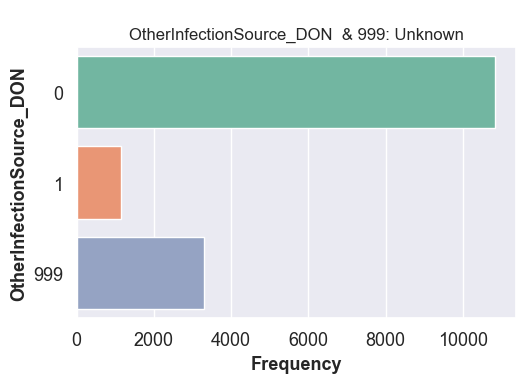

In [107]:
# plot CalculatedPanelReactiveAntibody_CPRA_CAN
vi.categoricalFeaturesCountPlot(df, Features, txt=' & 999: Unknown', figsize=(10, 4))

#### PCO2_DON

In [108]:
# add to feature
Features = df.columns[df.columns.str.contains('PCO2')].to_list()
Features

['PCO2_DON']

In [109]:
df[Features].describe().T

,count,mean,std,min,25%,50%,75%,max
PCO2_DON,15284.0,39.289758,6.984879,10.1,35.0,38.6,43.0,106.0


In [110]:
df_dict[df_dict.featureName.isin(Features)]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
193,PCO2_DON,DDR:pCO2:,DDR,ORGAN RECOVERY,NUM,DDR:pCO2:,Unknown,N/A


#### PreviousTransplantNumber_CAN

In [111]:
# add to feature
Features = df.columns[df.columns.str.contains('PreviousTransplantNumber')].to_list()
Features

['PreviousTransplantNumber_CAN']

In [112]:
df[Features].value_counts(dropna=False)

PreviousTransplantNumber_CAN
0                               14800
1                                 452
2                                  31
3                                   1
Name: count, dtype: int64

#### [Total Bilirubin](https://www.sciencedirect.com/science/article/pii/S0003986119303996?casa_token=lt5OUJPCz18AAAAA:_bL99NoJRM-kU2O6nGYnYpBlxSrOvgWZ0kv8husoZbCF85q1hlXhUlJP_iTqaJX0KTl30Ez0ztpz)
- Bilirubin is a key marker for assessing liver function and diagnosing various medical conditions. Monitoring bilirubin levels, both total and broken down into unconjugated and conjugated forms, provides critical insights into a patient's health status, particularly concerning liver and red blood cell health.

In [113]:
# add to feature
Features = df.columns[df.columns.str.contains('TotalBilirubin')].to_list()
Features

['TotalBilirubin_CAN', 'TotalBilirubin_DON']

In [114]:
df_dict[df_dict.featureName.isin(Features)]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
250,TotalBilirubin_CAN,MOST RECENT SERUM TOTAL BILIRUBIN @ TRANSPLANT,TRR,PRETRANSPLANT CLINICAL INFORMATION,Continuous - NUM,TRR TOTAL BILIRUBIN MG/DL,Unknown,"A total serum bilirubin (TSB) test measures the amount of bilirubin in the blood to assess liver health. Bilirubin is a yellowish pigment found in bile, a fluid produced by the liver. A small amount of bilirubin in the blood is normal, but high levels may indicate liver disease. - {'TBILI': 'TotalBilirubin_CAN', 'TBILI_DON': 'TotalBilirubin_DON'} - NaNs"
251,TotalBilirubin_DON,DECEASED DONOR-TERMINAL TOTAL BILIRUBIN,DDR,CLINICAL INFORMATION,Continuous - NUM,DDR TERMINAL LAB BILIRUBIN,Unknown,"A total serum bilirubin (TSB) test measures the amount of bilirubin in the blood to assess liver health. Bilirubin is a yellowish pigment found in bile, a fluid produced by the liver. A small amount of bilirubin in the blood is normal, but high levels may indicate liver disease. - {'TBILI': 'TotalBilirubin_CAN', 'TBILI_DON': 'TotalBilirubin_DON'} - NaNs"


In [115]:
df[Features].describe().T

,count,mean,std,min,25%,50%,75%,max
TotalBilirubin_CAN,14857.0,0.994528,1.813835,0.1,0.5,0.7,1.1,51.0
TotalBilirubin_DON,15094.0,1.047463,1.536677,0.0,0.5,0.7,1.1,45.4


In [116]:
df[Features].corr()

,TotalBilirubin_CAN,TotalBilirubin_DON
TotalBilirubin_CAN,1.000000,-0.001105
TotalBilirubin_DON,-0.001105,1.000000


In [117]:
# new feature for Preserving the magnitude
df['TotalBilirubin_Sum'] = df[['TotalBilirubin_CAN','TotalBilirubin_DON']].sum(axis=1)

# append to DataFrame
df_both = uf.insertIntoDataFrame(df_both, ['TotalBilirubin_Sum'])
df_remove = uf.insertIntoDataFrame(df_remove, Features)

#### TotalDayWaitList_CAN

In [118]:
# add to feature
Features = df.columns[df.columns.str.contains('TotalDayWaitList')].to_list()
Features

['TotalDayWaitList_CAN']

In [119]:
df[Features].describe().T

,count,mean,std,min,25%,50%,75%,max
TotalDayWaitList_CAN,15284.0,198.363714,354.386797,0.0,13.0,52.0,215.0,3835.0


#### [TotalSerumAlbumin_CAN](https://www.sciencedirect.com/science/article/pii/S107191641100100X)

In [120]:
# add to feature
Features = df.columns[df.columns.str.contains('TotalSerumAlbumin')].to_list()
Features

['TotalSerumAlbumin_CAN']

In [121]:
df_dict[df_dict.featureName.isin(Features)]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
255,TotalSerumAlbumin_CAN,PATIENT TOTAL SERUM ALBUMIN @ REGISTRATION (pre 1/1/2007 for adult),TCR,CLINICAL INFORMATION,Continuous - NUM,TCR TOTAL SERUM ALBUMIN AT LISTING (Pre 1/1/2007 for adult),Unknown,"A serum albumin test measures the amount of albumin, a protein produced by the liver, in a patient's blood. The normal range for serum albumin is 3.4 to 5.4 grams per deciliter (g/dL), but this may vary between laboratories. A serum albumin test can help determine if a patient has: Liver or kidney disease, Poor protein absorption, Inflammation, Infections, and Thyroid disease. - {'TOT_SERUM_ALBUM': 'TotalSerumAlbumin_CAN'}"


In [122]:
df[Features].describe().T

,count,mean,std,min,25%,50%,75%,max
TotalSerumAlbumin_CAN,328.0,3.841768,0.686162,1.0,3.6,3.9,4.3,5.4


In [123]:
df[Features].isna().sum()

TotalSerumAlbumin_CAN    14956
dtype: int64

### Examine & Consolidate - Label

In [124]:
# display data dictionary information
df_dict[df_dict.featureName.isin(df_label.label.to_list())]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
4,AcuteRejectionEpisode,DID RECIPIENT HAVE ANY ACUTE REJECTION EPISODES PRE DISCHARGE?,TRR,POST TRANSPLANT CLINICAL INFORMATION,Continuous - NUM,ACUTE REJECTION EPISODE,Unknown,Label SASAnalysisFormat: REJEPIKI - {'ACUTE_REJ_EPI': 'AcuteRejectionEpisode'} - ** 999: Unknown **
101,FunctionalStatusFollowUp,RECIPIENT FUNCTIONAL STATUS-MOST RECENT AT FOLLOW-UP,TRF,PATIENT STATUS AT TIME OF FOLLOW-UP,Ordinal - NUM,FUNCTIONAL STATUS AT MOST RECENT FOLLOW-UP,Unknown,"SASAnalysisFormat: FUNCSTAT - {'FUNC_STAT_TCR': 'FunctionalStatusRegistration_CAN', 'FUNC_STAT_TRF': 'FunctionalStatusFollowUp', 'FUNC_STAT_TRR': 'FunctionalStatusTransplant_CAN'}- ** 998: Unknown **"
105,GraftStatus,GRAFT STATUS,TRR/TRF,CLINICAL INFORMATION,Nominal - CHAR,GRAFT STATUS,Unknown,Label - {'GRF_STAT': 'GraftStatus'} - ** U: Unknown **
106,GraftFailed,GRAFT FAILED (1=YES),CALCULATED,Unknown,Nominal - NUM,"BOOLEAN: PAT_STAT IN(""D"",""R"")",Unknown,Label - {'GSTATUS': 'GraftFailed'} - ** 999: Unknown **
107,GraftLifeSpanDay,GRAFT LIFESPAN-Days From Transplant to Failure/Death/Last Follow-Up,CALCULATED,Unknown,Continuous - NUM,FOLLDATE - TX_DATE,Unknown,Label - {'GTIME': 'GraftLifeSpanDay'} - NaNs
176,LastFollowupNumber,LAST FOLLOWUP NUMBER,CALCULATED,Unknown,Ordinal - NUM,LAST FOLLOW-UP NUMBER,Unknown,Label - {'LASTFUNO': 'LastFollowupNumber'}
181,LengthOfStay,RECIPIENT LENGTH OF STAY POST TX,TRR-CALCULATED,"PATIENT STATUS(PRIORITY KIDNEY,THEN PANCREAS TRR)",Continuous - NUM,LENGTH OF STAY TX TO DISCHARGE - POST UNET,Unknown,Label - {'LOS': 'LengthOfStay'}
213,TransplantStatus,"Boolean Most Recent Patient Status (based on composite death date) (1=Dead, 0=Alive)",TRR/TRF-CALCULATED,PATIENT STATUS,Nominal - NUM,Boolean Most Recent Patient Status (based on composite death date),Unknown,Label - {'PSTATUS': 'TransplantStatus'} - ** 999: Unknown **
214,AirwayDehiscencePostTransplant,EVENTS PRIOR TO DISCHARGE: AIRWAY DEHISCENCE,TRR,POST TRANSPLANT CLINICAL INFORMATION,Nominal - CHAR,TRR AIRWAY DEHISCENCE - POST TRANSPLANT,Unknown,Bronchial dehiscence refers to loss of integrity of a bronchus which is most commonly encountered as an anastomotic (airway) dehiscence following lung transplantation. - {'PST_AIRWAY': 'AirwayDehiscencePostTransplant'} - ** 999: Unknown **
215,DialysisPriorDischarge,EVENTS PRIOR TO DISCHARGE: DIALYSIS,TRR,POST TRANSPLANT CLINICAL INFORMATION,Nominal - CHAR,TRR DIALYSIS - POST TRANSPLANT,Unknown,"{'DIAL_AFTER_LIST': 'DialysisListingTransplant_CAN', 'DIAL_PRIOR_TX': 'DialysisPriorListing_CAN', 'DIAL_TY_TCR': 'DialysisTypeRegistration_CAN', 'PST_DIAL': 'DialysisPriorDischarge'} - ** U: Unknown **"


In [125]:
print(sorted(set(df_label.label.to_list())))

['AcuteRejectionEpisode', 'AirwayDehiscencePostTransplant', 'DialysisPriorDischarge', 'FunctionalStatusFollowUp', 'GraftFailed', 'GraftLifeSpanDay', 'GraftStatus', 'LastFollowupNumber', 'LengthOfStay', 'PacemakerPostTransplant', 'RecipientStatus', 'RejectionTreatmentWithinOneYear', 'StrokePostTransplant', 'TransplantStatus', 'TransplantSurvivalDay']


#### AcuteRejectionEpisode

In [126]:
df['AcuteRejectionEpisode'].value_counts(dropna=False)

AcuteRejectionEpisode
No                                                             11961
Yes, at least one episode treated with anti-rejection agent     1509
Yes, none treated with additional anti-rejection agent          1342
Unknown                                                          472
Name: count, dtype: int64

In [127]:
# mapping AcuteRejectionEpisode
mapping = {'No': "No", 'Yes, at least one episode treated with anti-rejection agent': "Yes",'Yes, none treated with additional anti-rejection agent':"Yes"}

# new feature
df['AcuteRejection'] = df['AcuteRejectionEpisode'].map(mapping).fillna("Unknown").astype('category')

# append to DataFrame
df_label = uf.insertIntoDataFrame(df_label, ['AcuteRejection'])
df_nominal = uf.insertIntoDataFrame(df_nominal, ['AcuteRejection'])

In [128]:
pd.DataFrame(df['AcuteRejection'].value_counts(dropna=False)).T

AcuteRejection,No,Yes,Unknown
count,11961,2851,472


#### AirwayDehiscencePostTransplant

In [129]:
pd.DataFrame(df['AirwayDehiscencePostTransplant'].value_counts(dropna=False)).T

AirwayDehiscencePostTransplant,N,U,Y
count,14760,484,40


#### DialysisPriorDischarge

In [130]:
pd.DataFrame(df['DialysisPriorDischarge'].value_counts(dropna=False)).T

DialysisPriorDischarge,N,Y,U
count,12506,2300,478


#### FunctionalStatusFollowUp

In [131]:
df['FunctionalStatusFollowUp'].value_counts(dropna=False)

FunctionalStatusFollowUp
Unknown                                                                      3801
100% - Normal, no complaints, no evidence of disease                         3410
90% - Able to carry on normal activity: minor symptoms of disease            2899
80% - Normal activity with effort: some symptoms of disease                  1627
20% - Very sick, hospitalization necessary: active treatment necessary        941
70% - Cares for self: unable to carry on normal activity or active work       885
10% - Moribund, fatal processes progressing rapidly                           468
60% - Requires occasional assistance but is able to care for needs            360
50% - Requires considerable assistance and frequent medical care              324
40% - Disabled: requires special care and assistance                          309
30% - Severely disabled: hospitalization is indicated, death not imminent     260
Name: count, dtype: int64

In [132]:
functionalStatusMapping = {
    "100% - Normal, no complaints, no evidence of disease": "Functional",
    "90% - Able to carry on normal activity: minor symptoms of disease": "Functional",
    "80% - Normal activity with effort: some symptoms of disease": "Functional",
    "70% - Cares for self: unable to carry on normal activity or active work": "Functional",
    "60% - Requires occasional assistance but is able to care for needs": "Functional",
    "50% - Requires considerable assistance and frequent medical care": "Limited",
    "40% - Disabled: requires special care and assistance": "Limited",
    "30% - Severely disabled: hospitalization is indicated, death not imminent": "Critical",
    "20% - Very sick, hospitalization necessary: active treatment necessary": "Critical",
    "10% - Moribund, fatal processes progressing rapidly": "Critical"
}

# new feature
df['FunctionalStatusFollowUp_Combined'] = df['FunctionalStatusFollowUp'].map(functionalStatusMapping).fillna(df['FunctionalStatusFollowUp']).astype('category')

# append to DataFrame
df_label = uf.insertIntoDataFrame(df_label, ['FunctionalStatusFollowUp_Combined'])
df_ordinal = uf.insertIntoDataFrame(df_ordinal, ['FunctionalStatusFollowUp_Combined'])

In [133]:
pd.DataFrame(df['FunctionalStatusFollowUp_Combined'].value_counts(dropna=False)).T

FunctionalStatusFollowUp_Combined,Functional,Unknown,Critical,Limited
count,9181,3801,1669,633


#### GraftFailed

In [134]:
pd.DataFrame(df.GraftFailed.value_counts(dropna=False)).T

GraftFailed,0,1,999
count,12957,1901,426


#### GraftLifeSpanDay

In [135]:
pd.DataFrame(df['GraftLifeSpanDay']).describe().T

,count,mean,std,min,25%,50%,75%,max
GraftLifeSpanDay,14858.0,633.486539,473.95242,0.0,194.0,603.5,1084.0,1799.0


In [136]:
print(f"Total NaNs for GraftLifeSpanDay: {df.GraftLifeSpanDay.isna().sum()}")

Total NaNs for GraftLifeSpanDay: 426


#### GraftStatus

In [137]:
pd.DataFrame(df.GraftStatus.value_counts(dropna=False)).T

GraftStatus,Y,N,U
count,14328,517,439


#### LastFollowupNumber

In [138]:
df['LastFollowupNumber'].value_counts(dropna=False)

LastFollowupNumber
10     2850
20     2686
1      2479
30     2424
40     2035
6      1584
999    1191
800      19
998      16
Name: count, dtype: int64

#### LengthOfStay

In [139]:
pd.DataFrame(df['LengthOfStay']).describe().T

,count,mean,std,min,25%,50%,75%,max
LengthOfStay,15284.0,23.066475,25.313919,0.0,12.0,16.0,25.0,621.0


In [140]:
print(f"Total NaNs for LengthOfStay: {df.LengthOfStay.isna().sum()}")

Total NaNs for LengthOfStay: 0


#### PacemakerPostTransplant

In [141]:
pd.DataFrame(df['PacemakerPostTransplant'].value_counts(dropna=False)).T

PacemakerPostTransplant,N,U,Y
count,14509,492,283


#### RecipientStatus

In [142]:
pd.DataFrame(df['RecipientStatus'].value_counts(dropna=False)).T

RecipientStatus,Living,Dead,Unknown,Re-transplanted,Lost to Follow Up
count,12980,1823,390,75,16


#### RejectionTreatmentWithinOneYear

In [143]:
pd.DataFrame(df['RejectionTreatmentWithinOneYear'].value_counts(dropna=False)).T

RejectionTreatmentWithinOneYear,N,U,Y
count,8496,5011,1777


#### StrokePostTransplant

In [144]:
pd.DataFrame(df['StrokePostTransplant'].value_counts(dropna=False)).T

StrokePostTransplant,N,Y,U
count,14266,516,502


#### TransplantStatus

In [145]:
pd.DataFrame(df['TransplantStatus'].value_counts(dropna=False)).T

TransplantStatus,0,1,999
count,13006,1853,425


#### TransplantSurvivalDay

In [146]:
pd.DataFrame(df['TransplantSurvivalDay']).describe().T

,count,mean,std,min,25%,50%,75%,max
TransplantSurvivalDay,14859.0,634.210378,473.987036,0.0,194.0,606.0,1084.0,1799.0


In [147]:
print(f"Total NaNs for TransplantSurvivalDay: {df.TransplantSurvivalDay.isna().sum()}")

Total NaNs for TransplantSurvivalDay: 425


### Examine & Consolidate - Category

In [148]:
print(sorted(df_nominal.nominal.to_list() + df_ordinal.ordinal.to_list()))

['AcuteRejection', 'AcuteRejectionEpisode', 'AirwayDehiscencePostTransplant', 'AllocationType', 'AntibodyResultHBSAB_DON', 'Antibody_HEP_C_DON', 'AntigenBW4_CAN', 'AntigenBW6_CAN', 'AntigenBW_CAN_Sum', 'AntigenC1_CAN', 'AntigenC2_CAN', 'AntigenC_CAN_Sum', 'AntigenDQ1_CAN', 'AntigenDQ2_CAN', 'AntigenDQ_CAN_Sum', 'AntigenDR512_522_532_CAN_Sum', 'AntigenDR51_2_CAN', 'AntigenDR51_52_53_CAN_Sum', 'AntigenDR51_CAN', 'AntigenDR52_2_CAN', 'AntigenDR52_CAN', 'AntigenDR53_2_CAN', 'AntigenDR53_CAN', 'AntigenHLAcompatibility_A1', 'AntigenHLAcompatibility_A2', 'AntigenHLAcompatibility_B1', 'AntigenHLAcompatibility_B2', 'AntigenHLAcompatibility_DR1', 'AntigenHLAcompatibility_DR2', 'AntigenHistocompatibility_B1_DON', 'AntigenHistocompatibility_B2_DON', 'AntigenHistocompatibility_DA1_DON', 'AntigenHistocompatibility_DA2_DON', 'AntigenHistocompatibility_DR1_DON', 'AntigenHistocompatibility_DR2_DON', 'Antihypertensive_DON', 'ArginnieManagement_DON', 'Biopsy_DON', 'BloodGroupMatchLevel', 'BloodGroup_CAN'

#### AllocationType

In [149]:
pd.DataFrame(df.AllocationType.value_counts(dropna=False)).T

AllocationType,Local,National,Regional,Foreign Donor
count,6017,5752,3503,12


In [150]:
# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, ['AllocationType'])

#### Antibody

In [151]:
# add to feature
Features = df.columns[(df.columns.str.contains('^Antibody'))].to_list()
Features

['Antibody_HEP_C_DON', 'AntibodyResultHBSAB_DON']

In [152]:
df[Features].describe().T

,count,unique,top,freq
Antibody_HEP_C_DON,15284,4,Negative,13861
AntibodyResultHBSAB_DON,15284,5,Not Done,13296


#### Antigen

In [153]:
# add to feature
Features = df.columns[(df.columns.str.contains('^Antigen')) & (~df.columns.str.contains('_Sum'))].to_list()
Features

['AntigenBW4_CAN',
 'AntigenBW6_CAN',
 'AntigenC1_CAN',
 'AntigenC2_CAN',
 'AntigenDR51_CAN',
 'AntigenDR51_2_CAN',
 'AntigenDR52_CAN',
 'AntigenDR52_2_CAN',
 'AntigenDR53_CAN',
 'AntigenDR53_2_CAN',
 'AntigenDQ1_CAN',
 'AntigenDQ2_CAN',
 'AntigenHistocompatibility_DA1_DON',
 'AntigenHistocompatibility_DA2_DON',
 'AntigenHistocompatibility_B1_DON',
 'AntigenHistocompatibility_B2_DON',
 'AntigenHistocompatibility_DR1_DON',
 'AntigenHistocompatibility_DR2_DON',
 'AntigenHLAcompatibility_A1',
 'AntigenHLAcompatibility_A2',
 'AntigenHLAcompatibility_B1',
 'AntigenHLAcompatibility_B2',
 'AntigenHLAcompatibility_DR1',
 'AntigenHLAcompatibility_DR2']

In [154]:
df[Features].describe().T

,count,mean,std,min,25%,50%,75%,max
AntigenBW4_CAN,15284.0,33.036182,45.364356,0.0,0.0,0.0,95.0,99.0
AntigenBW6_CAN,15284.0,34.159055,45.639595,0.0,0.0,0.0,95.0,99.0
AntigenC1_CAN,15284.0,14.242803,85.516280,0.0,0.0,0.0,4.0,1701.0
AntigenC2_CAN,15284.0,30.358218,174.366584,0.0,0.0,0.0,7.0,1802.0
AntigenDR51_CAN,15284.0,28.973436,43.960842,0.0,0.0,0.0,95.0,99.0
AntigenDR51_2_CAN,15284.0,9.718725,28.961551,0.0,0.0,0.0,0.0,99.0
AntigenDR52_CAN,15284.0,29.238746,43.873986,0.0,0.0,0.0,95.0,99.0
AntigenDR52_2_CAN,15284.0,9.565820,28.683877,0.0,0.0,0.0,0.0,99.0
AntigenDR53_CAN,15284.0,29.181759,43.961118,0.0,0.0,0.0,95.0,99.0
AntigenDR53_2_CAN,15284.0,9.539911,28.706411,0.0,0.0,0.0,0.0,99.0


#### Antihypertensive_DON

In [155]:
pd.DataFrame(df.Antihypertensive_DON.value_counts(dropna=False)).T

Antihypertensive_DON,N,Y,U
count,9820,5268,196


#### ArginnieManagement_DON

In [156]:
pd.DataFrame(df.ArginnieManagement_DON.value_counts(dropna=False)).T

ArginnieManagement_DON,Y,N,U
count,10690,4401,193


#### Biopsy

In [157]:
# add to feature
Features = df.columns[(df.columns.str.contains('^Biopsy'))].to_list()
Features

['Biopsy_DON']

In [158]:
df[Features].describe().T

,count,unique,top,freq
Biopsy_DON,15284,4,Needle,15083


#### Blood

In [159]:
# add to feature
Features = df.columns[(df.columns.str.contains('^Blood'))].to_list()
Features

['BloodGroup_CAN',
 'BloodGroup_DON',
 'BloodInfectionSource_DON',
 'BloodUreaNitrogenLevel_DON',
 'BloodGroupMatchLevel',
 'BloodPH_DON']

In [160]:
df[Features].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BloodGroup_CAN,15284,8,O,6099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BloodGroup_DON,15284,8,O,7852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BloodInfectionSource_DON,15284.0,3.0,0.0,13681.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BloodUreaNitrogenLevel_DON,15095.0,NaN,NaN,NaN,27.344747,22.139277,1.0,14.0,21.0,32.0,250.0
BloodGroupMatchLevel,15284,3,Identical,13095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BloodPH_DON,15284.0,NaN,NaN,NaN,7.418839,0.066321,6.0,7.38,7.42,7.46,7.93


In [161]:
# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, ['BloodGroup_DON','BloodGroup_CAN']) # due to the BloodGroupMatchLevel

#### Bronchoscopy

In [162]:
# add to feature
Features = df.columns[df.columns.str.contains('^Bronchoscopy')].to_list()
Features

['BronchoscopyLeft_DON', 'BronchoscopyRight_DON']

In [163]:
df[Features].describe(include='all').T

,count,unique,top,freq
BronchoscopyLeft_DON,15284,8,Unknown,7892
BronchoscopyRight_DON,15284,8,Unknown,7933


In [164]:
df.BronchoscopyLeft_DON.value_counts(dropna=False)

BronchoscopyLeft_DON
Unknown                                                      7892
Bronchoscopy Results normal                                  5375
Bronchoscopy Results, Abnormal-purulent secretions           1079
Bronchoscopy Results, Abnormal-blood                          444
No Bronchoscopy                                               340
Bronchoscopy Results, Abnormal-anatomy/other lesion            89
Bronchoscopy Results, Abnormal-aspiration of foreign body      56
Bronchoscopy Results, Unknown                                   9
Name: count, dtype: int64

In [165]:
df.BronchoscopyRight_DON.value_counts(dropna=False)

BronchoscopyRight_DON
Unknown                                                      7933
Bronchoscopy Results normal                                  5065
Bronchoscopy Results, Abnormal-purulent secretions           1250
Bronchoscopy Results, Abnormal-blood                          486
No Bronchoscopy                                               352
Bronchoscopy Results, Abnormal-anatomy/other lesion           106
Bronchoscopy Results, Abnormal-aspiration of foreign body      77
Bronchoscopy Results, Unknown                                  15
Name: count, dtype: int64

In [166]:
# define conditions and choices for the new column
conditions = [
    df[Features].eq('Bronchoscopy Results normal').all(axis=1),   # if all columns are 'Bronchoscopy Results normal'
    df[Features].eq('Unknown').all(axis=1),   # if all columns are 'Unknown'
    df[Features].eq('No Bronchoscopy').all(axis=1),   # if all columns are 'No Bronchoscopy'
    df[Features].eq('Bronchoscopy Results, Unknown').all(axis=1)  # if all are 'Unknown'
]
# select choice
choices = ['Normal', 'Unknown', 'Unknown', 'Unknown']

# apply np.select to create the new column based on conditions
df['Bronchoscopy_Combined_DON'] = np.select(conditions, choices, default='Abnormal')
# change to category datatype
df['Bronchoscopy_Combined_DON'] = df['Bronchoscopy_Combined_DON'].astype('category')

# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, Features)
df_nominal = uf.insertIntoDataFrame(df_nominal, ['Bronchoscopy_Combined_DON'])

# display
df[['BronchoscopyLeft_DON', 'BronchoscopyRight_DON', 'Bronchoscopy_Combined_DON']].sample(10)

,BronchoscopyLeft_DON,BronchoscopyRight_DON,Bronchoscopy_Combined_DON
13632,Unknown,Unknown,Unknown
5297,Unknown,Unknown,Unknown
12808,Bronchoscopy Results normal,Bronchoscopy Results normal,Normal
14695,"Bronchoscopy Results, Abnormal-blood","Bronchoscopy Results, Abnormal-blood",Abnormal
3028,Unknown,Unknown,Unknown
9431,Bronchoscopy Results normal,Bronchoscopy Results normal,Normal
8339,Unknown,Unknown,Unknown
720,Bronchoscopy Results normal,Bronchoscopy Results normal,Normal
5591,Bronchoscopy Results normal,"Bronchoscopy Results, Abnormal-purulent secretions",Abnormal
10365,Unknown,Unknown,Unknown


#### CMVStatusTransplant_CAN

In [167]:
pd.DataFrame(df['CMVStatusTransplant_CAN']).describe(include='all').T

,count,unique,top,freq
CMVStatusTransplant_CAN,15284,4,Positive,8163


In [168]:
pd.DataFrame(df.CMVStatusTransplant_CAN.value_counts(dropna=False)).T

CMVStatusTransplant_CAN,Positive,Negative,Unknown,Not Done
count,8163,6487,434,200


#### Cancer

In [169]:
# add to feature
Features = df.columns[df.columns.str.contains('^Cancer')].to_list()
Features

['CancerExtraCranial_DON',
 'CancerSite_DON',
 'CancerIntraCranial_DON',
 'CancerHistory_DON',
 'CancerSkin_DON']

In [170]:
df[Features].describe().T

,count,unique,top,freq
CancerExtraCranial_DON,15284,3,N,14976
CancerSite_DON,15284,23,NO,14963
CancerIntraCranial_DON,15284,3,N,14976
CancerHistory_DON,15284,3,N,14963
CancerSkin_DON,15284,3,N,14995


In [171]:
df.CancerSite_DON.value_counts(dropna=False)

CancerSite_DON
NO                                              14963
UNKNOWN                                           126
OTHER, SPECIFY                                     44
SKIN - SQUAMOUS, BASAL CELL                        39
GENITOURINARY - UTERINE CERVIX                     27
THYROID                                            13
CNS TUMOR - ASTROCYTOMA                             8
GENITOURINARY - PENIS, TESTICULAR                   8
CNS TUMOR - GLIOBLASTOMA MULTIFORME                 8
CNS TUMOR - OTHER                                   7
CNS TUMOR - MENINGIOMA                              7
BREAST                                              7
GENITOURINARY - OVARIAN                             5
GENITOURINARY - PROSTATE                            4
LEUKEMIA/LYMPHOMA                                   4
GENITOURINARY - KIDNEY                              3
SKIN - MELANOMA                                     3
GASTROINTESTINAL - COLO-RECTAL                      2
CNS TUMOR - M

In [172]:
mapping = {
    "NO": "No",
    "UNKNOWN": "Unknown",
    "OTHER, SPECIFY": "Yes",
    "SKIN - SQUAMOUS, BASAL CELL": "Yes",
    "GENITOURINARY - UTERINE CERVIX": "Yes",
    "THYROID": "Yes",
    "CNS TUMOR - ASTROCYTOMA": "Yes",
    "GENITOURINARY - PENIS, TESTICULAR": "Yes",
    "CNS TUMOR - GLIOBLASTOMA MULTIFORME": "Yes",
    "CNS TUMOR - OTHER": "Yes",
    "CNS TUMOR - MENINGIOMA": "Yes",
    "BREAST": "Yes",
    "GENITOURINARY - OVARIAN": "Yes",
    "GENITOURINARY - PROSTATE": "Yes",
    "LEUKEMIA/LYMPHOMA": "Yes",
    "GENITOURINARY - KIDNEY": "Yes",
    "SKIN - MELANOMA": "Yes",
    "GASTROINTESTINAL - COLO-RECTAL": "Yes",
    "CNS TUMOR - MEDULLOBLASTOMA": "Yes",
    "GENITOURINARY - BLADDER": "Yes",
    "GASTROINTESTINAL - STOMACH": "Yes",
    "GENITOURINARY - UTERINE BODY CHORIOCARCINOMA": "Yes",
    "GENITOURINARY - UTERINE BODY ENDOMETRIAL": "Yes"
}

# new feature
df['Cancer_DON'] = df['CancerSite_DON'].map(mapping).astype('category')

# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, Features)
df_don = uf.insertIntoDataFrame(df_don, ['Cancer_DON'])
df_nominal = uf.insertIntoDataFrame(df_nominal, ['Cancer_DON'])

# display
pd.DataFrame(df.Cancer_DON.value_counts(dropna=False)).T

Cancer_DON,No,Yes,Unknown
count,14963,195,126


#### CardiacArrest_DON

In [173]:
pd.DataFrame(df.CardiacArrest_DON.value_counts(dropna=False)).T

CardiacArrest_DON,N,Y,U
count,13746,1041,497


#### Death

In [174]:
# add to feature
Features = df.columns[df.columns.str.contains('Death')].to_list()
Features

['CauseOfDeath_DON', 'DeathCircumstance_DON', 'DeathMechanism_DON']

In [175]:
df[Features].describe().T

,count,unique,top,freq
CauseOfDeath_DON,15284,6,ANOXIA,6435
DeathCircumstance_DON,15284,7,DEATH FROM NATURAL CAUSES,3355
DeathMechanism_DON,15284,13,BLUNT INJURY,3868


In [176]:
df[Features].head()

,CauseOfDeath_DON,DeathCircumstance_DON,DeathMechanism_DON
0,HEAD TRAUMA,HOMICIDE,GUNSHOT WOUND
1,ANOXIA,DEATH FROM NATURAL CAUSES,CARDIOVASCULAR
2,ANOXIA,SUICIDE,DRUG INTOXICATION
3,CEREBROVASCULAR/STROKE,DEATH FROM NATURAL CAUSES,INTRACRANIAL HEMORRHAGE/STROKE
4,CEREBROVASCULAR/STROKE,DEATH FROM NATURAL CAUSES,INTRACRANIAL HEMORRHAGE/STROKE


#### CerebroVascularDisease_CAN

In [177]:
pd.DataFrame(df.CerebroVascularDisease_CAN.value_counts(dropna=False)).T

CerebroVascularDisease_CAN,N,Y,U
count,14061,1046,177


#### ChestXray_DON

In [178]:
pd.DataFrame(df.ChestXray_DON.value_counts(dropna=False)).T

ChestXray_DON,Abnormal-both,Normal,Abnormal-right,Abnormal-left,Unknown if chest x-ray performed,Results Unknown,No chest x-ray
count,8843,2745,1672,1223,763,33,5


#### Cigarette

In [179]:
# add to feature
Features = df.columns[df.columns.str.contains('Cigarette')].to_list()
Features

['CigaretteUse_CAN', 'CigaretteAbstinence_CAN', 'CigaretteHistory_DON']

In [180]:
df[Features].describe().T

,count,unique,top,freq
CigaretteUse_CAN,15284,3,N,8787
CigaretteAbstinence_CAN,15284,10,Unknown,8860
CigaretteHistory_DON,15284,3,N,13191


#### Citizenship

In [181]:
# add to feature
Features = df.columns[df.columns.str.contains('Citizenship')].to_list()
Features

['Citizenship_CAN', 'Citizenship_DON']

In [182]:
df[Features].describe().T

,count,unique,top,freq
Citizenship_CAN,15284,4,US Citizen,14608
Citizenship_DON,15284,4,US Citizen,13388


In [183]:
# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, Features)

#### ClinicalInfection_DON

In [184]:
pd.DataFrame(df.ClinicalInfection_DON.value_counts(dropna=False)).T

ClinicalInfection_DON,Y,N,U
count,11991,3087,206


#### Cocaine

In [185]:
# add to feature
Features = df.columns[df.columns.str.contains('Cocaine|PastOtherDrugUse_DON|OtherDrugUse_DON')].to_list()
Features

['PastCocaineUse_DON',
 'CocaineUse_DON',
 'OtherDrugUse_DON',
 'PastOtherDrugUse_DON']

In [186]:
df_dict[df_dict.featureName.isin(Features)]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
38,CocaineUse_DON,DECEASED DONOR-HISTORY OF COCAINE USE+RECENT 6MO USE,DDR,DONOR HISTORY,Nominal - CHAR,DDR COCAINE USE IN LAST 6 MONTHS (Y/N),Unknown,"{'CONTIN_COCAINE_DON': 'CocaineUse_DON', 'HIST_COCAINE_DON': 'PastCocaineUse_DON'} - ** U: Unknown **"
39,OtherDrugUse_DON,DECEASED DONOR-HISTORY OF OTHER DRUGS IN PAST+RECENT 6MO USE,DDR,DONOR HISTORY,Nominal - CHAR,DDR CONTINUED OTHER DRUG USE,Unknown,"- {'CONTIN_OTH_DRUG_DON': 'OtherDrugUse_DON', 'HIST_OTH_DRUG_DON': 'PastOtherDrugUse_DON'} - ** U: Unknown **"
137,PastCocaineUse_DON,DECEASED DONOR-HISTORY OF COCAINE USE IN PAST,DDR,DONOR HISTORY,Nominal - CHAR,DDR HISTORY OF COCAINE (Y/N),Unknown,"{'CONTIN_COCAINE_DON': 'CocaineUse_DON', 'HIST_COCAINE_DON': 'PastCocaineUse_DON'} - ** U: Unknown **"
141,PastOtherDrugUse_DON,DECEASED DONOR-HISTORY OF OTHER DRUG USE IN PAST,DDR,DONOR HISTORY,Nominal - CHAR,DDR HISTORY OF OTHER DRUG USE (Y/N),Unknown,"- {'CONTIN_OTH_DRUG_DON': 'OtherDrugUse_DON', 'HIST_OTH_DRUG_DON': 'PastOtherDrugUse_DON'} - ** U: Unknown **"


In [187]:
df[Features].describe().T

,count,unique,top,freq
PastCocaineUse_DON,15284,3,N,10839
CocaineUse_DON,15284,3,U,11828
OtherDrugUse_DON,15284,3,Y,7417
PastOtherDrugUse_DON,15284,3,Y,9229


##### Test of Independence for Categorical Variables
- Null Hypothesis ($H_0$): The two variables are not related.
- Alternative Hypothesis ($H_1$): The two variables are related.

##### Cramer's V values can be interpreted as:
- Cramer's V is a measure of association between two nominal (categorical) variables, based on the Chi-Square statistic and varies from `0` (corresponding to no association between the variables) to `1` (complete association) and can reach 1 only when each variable is completely determined by the other.
    - 0.00 to 0.10: Negligible Association
    - 0.10 to 0.30: Weak Association
    - 0.30 to 0.50: Moderate Association
    - 0.50 to 0.70: Strong Association
    - 0.70 to 1.00: Very strong Association

In [188]:
uf.pairColsMultiIndependenceCat(df, Features)

,column1,column2,chi2,p_value,cramer_v
0,PastCocaineUse_DON,CocaineUse_DON,12701.027930,0.000000e+00,0.644594
5,OtherDrugUse_DON,PastOtherDrugUse_DON,12674.480517,0.000000e+00,0.643919
2,PastCocaineUse_DON,PastOtherDrugUse_DON,9531.593930,0.000000e+00,0.558405
3,CocaineUse_DON,OtherDrugUse_DON,1985.536792,0.000000e+00,0.254862
1,PastCocaineUse_DON,OtherDrugUse_DON,1433.208967,4.350229e-309,0.216532
4,CocaineUse_DON,PastOtherDrugUse_DON,1259.462780,2.046335e-271,0.202983


In [189]:
pd.DataFrame(df.PastCocaineUse_DON.value_counts(dropna=False)).T

PastCocaineUse_DON,N,Y,U
count,10839,3976,469


In [190]:
pd.DataFrame(df.CocaineUse_DON.value_counts(dropna=False)).T

CocaineUse_DON,U,Y,N
count,11828,2303,1153


In [191]:
Features = ['PastCocaineUse_DON','CocaineUse_DON']

# define conditions and choices for the new column
conditions = [
    df[Features].eq('Y').any(axis=1),
    df[Features].eq('N').all(axis=1),
    df[Features].eq('U').all(axis=1)
]
# select choice
choices = ['Yes', 'No', 'Unknown']

# apply np.select to create the new column based on conditions
df['CocaineUse_Combined_DON'] = np.select(conditions, choices, default='No')
# change dataype to category
df['CocaineUse_Combined_DON'] = df['CocaineUse_Combined_DON'].astype('category')

# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, Features)
df_nominal = uf.insertIntoDataFrame(df_nominal, ['CocaineUse_Combined_DON'])

# display
df[['PastCocaineUse_DON', 'CocaineUse_DON', 'CocaineUse_Combined_DON']].sample(10)

,PastCocaineUse_DON,CocaineUse_DON,CocaineUse_Combined_DON
5970,N,U,No
6964,Y,N,Yes
13620,N,U,No
3674,Y,Y,Yes
11722,N,U,No
2728,Y,Y,Yes
5680,N,U,No
10963,N,U,No
6278,N,U,No
14656,N,U,No


In [192]:
pd.DataFrame(df.CocaineUse_Combined_DON.value_counts(dropna=False)).T

CocaineUse_Combined_DON,No,Yes,Unknown
count,10839,3976,469


In [193]:
Features = ['PastOtherDrugUse_DON','OtherDrugUse_DON']

# define conditions and choices for the new column
conditions = [
    df[Features].eq('Y').any(axis=1),
    df[Features].eq('N').all(axis=1),
    df[Features].eq('U').all(axis=1)
]
# select choice
choices = ['Yes', 'No', 'Unknown']

# apply np.select to create the new column based on conditions
df['OtherDrugUse_Combined_DON'] = np.select(conditions, choices, default='No')
# change dataype to category
df['OtherDrugUse_Combined_DON'] = df['OtherDrugUse_Combined_DON'].astype('category')

# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, Features)
df_nominal = uf.insertIntoDataFrame(df_nominal, ['OtherDrugUse_Combined_DON'])

# display
df[['PastOtherDrugUse_DON', 'OtherDrugUse_DON', 'OtherDrugUse_Combined_DON']].sample(10)

,PastOtherDrugUse_DON,OtherDrugUse_DON,OtherDrugUse_Combined_DON
7683,Y,Y,Yes
13592,Y,Y,Yes
15071,U,U,Unknown
9279,Y,Y,Yes
14753,Y,U,Yes
5105,Y,Y,Yes
1758,Y,Y,Yes
7804,N,U,No
7522,Y,U,Yes
372,N,U,No


In [194]:
pd.DataFrame(df.OtherDrugUse_Combined_DON.value_counts(dropna=False)).T

OtherDrugUse_Combined_DON,Yes,No,Unknown
count,9229,5691,364


#### CoronaryAngiogram_DON

In [195]:
pd.DataFrame(df.CoronaryAngiogram_DON.value_counts(dropna=False)).T

CoronaryAngiogram_DON,No,"Yes, normal","Yes, not normal",Unknown
count,8900,5660,531,193


#### CrossMatch

In [196]:
pd.DataFrame(df.CrossMatch.value_counts(dropna=False)).T

CrossMatch,Y,N,U
count,13954,745,585


In [197]:
df_dict[df_dict.featureName.isin(['CrossMatch'])]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
45,CrossMatch,CROSSMATCH DONE Y/N,RH,TEST INFORMATION,Nominal - CHAR,RH CROSS MATCH DONE?,Unknown,{'CRSMATCH_DONE': 'CrossMatch'} - ** U: Unknown **


#### DeceasedRetyped_DON

In [198]:
pd.DataFrame(df.DeceasedRetyped_DON.value_counts(dropna=False)).T

DeceasedRetyped_DON,Y,N,U
count,9527,5170,587


In [199]:
df_dict[df_dict.featureName.isin(['DeceasedRetyped_DON'])]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
73,DeceasedRetyped_DON,DECEASED DONOR-RETYPED AT TX CENTER,RH,TEST INFORMATION,Nominal - CHAR,RH DONOR RETYPED AT YOUR CENTER,Unknown,Label - {'DON_RETYP': 'DeceasedRetyped_DON'} - ** U: Unknown **


#### DefibrillatorImplant_CAN

In [200]:
pd.DataFrame(df.DefibrillatorImplant_CAN.value_counts(dropna=False)).T

DefibrillatorImplant_CAN,Y,N,U
count,10830,4119,335


In [201]:
df_dict[df_dict.featureName.isin(['DefibrillatorImplant_CAN'])]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
149,DefibrillatorImplant_CAN,IMPLANTABLE DEFIBRILLATOR Y/N/U @ REGISTRATION,TCR,CLINICAL INFORMATION,Nominal - CHAR,TCR IMPLANTABLE DEFIBRILLATOR,Unknown,{'IMPL_DEFIBRIL': 'DefibrillatorImplant_CAN'} - ** U: Unknown **


#### Diabetes

In [202]:
# add to feature
Features = df.columns[df.columns.str.contains('Diabetes')].to_list()
Features

['DiabetesType_CAN', 'DiabetesHistory_DON', 'Diabetes_DON']

In [203]:
df[Features].describe().T

,count,unique,top,freq
DiabetesType_CAN,15284,6,No,10769
DiabetesHistory_DON,15284,6,No,14569
Diabetes_DON,15284,3,N,14569


In [204]:
pd.DataFrame(df.DiabetesType_CAN.value_counts(dropna=False)).T

DiabetesType_CAN,No,Type II,Type I,Type Unknown,Type Other,Unknown
count,10769,4078,174,98,83,82


In [205]:
mapping = {
    "No": "No",
    "Type II": "Yes",
    "Type I": "Yes",
    "Type Unknown": "Yes",
    "Type Other": "Yes",
    "Unknown": "Unknown"
}

# new feature
df['Diabetes_CAN'] = df['DiabetesType_CAN'].map(mapping).astype('category')

# append to DataFrame
df_can = uf.insertIntoDataFrame(df_can, ['Diabetes_CAN'])
df_nominal = uf.insertIntoDataFrame(df_nominal, ['Diabetes_CAN'])

# display
pd.DataFrame(df.Diabetes_CAN.value_counts(dropna=False)).T

Diabetes_CAN,No,Yes,Unknown
count,10769,4433,82


#### Diagnosis

In [206]:
# add to feature
Features = df.columns[df.columns.str.contains('Diagnosis')].to_list()
Features

['WaitListDiagnosisCode_CAN',
 'DiagnosisAtListing_CAN',
 'PrimaryDiagnosisType_CAN']

In [207]:
df[Features].describe().T

,count,unique,top,freq
WaitListDiagnosisCode_CAN,15284,36,DILATED MYOPATHY: IDIOPATHIC,5239
DiagnosisAtListing_CAN,15211,36,DILATED MYOPATHY: IDIOPATHIC,5289
PrimaryDiagnosisType_CAN,15284,37,DILATED MYOPATHY: IDIOPATHIC,5282


##### Test of Independence for Categorical Variables
- Null Hypothesis ($H_0$): The two variables are not related.
- Alternative Hypothesis ($H_1$): The two variables are related.
- A low p-value (typically < 0.05) indicates a significant relationship between the variables.
- This is the Chi-Square test statistic. It measures the discrepancy between the observed and expected frequencies under the assumption that the variables are independent.
    - A larger `chi2` value indicates a greater difference between observed and expected counts, suggesting that the variables are more likely to be associated.
    - A small p_value (typically < 0.05) suggests that you can reject the null hypothesis and conclude that there is a significant association between the two variables.

##### Cramer's V values can be interpreted as:
- Cramer's V is a measure of association between two nominal (categorical) variables, based on the Chi-Square statistic and varies from `0` (corresponding to no association between the variables) to `1` (complete association) and can reach 1 only when each variable is completely determined by the other.
    - 0.00 to 0.10: Negligible Association
    - 0.10 to 0.30: Weak Association
    - 0.30 to 0.50: Moderate Association
    - 0.50 to 0.70: Strong Association
    - 0.70 to 1.00: Very strong Association

In [208]:
uf.pairColsMultiIndependenceCat(df, Features)

,column1,column2,chi2,p_value,cramer_v
0,WaitListDiagnosisCode_CAN,DiagnosisAtListing_CAN,285138.019614,0.0,0.731837
2,DiagnosisAtListing_CAN,PrimaryDiagnosisType_CAN,270211.156291,0.0,0.712424
1,WaitListDiagnosisCode_CAN,PrimaryDiagnosisType_CAN,227888.297580,0.0,0.652692


In [209]:
df_dict[df_dict.featureName.isin(Features)]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
67,PrimaryDiagnosisType_CAN,RECIPIENT PRIMARY DIAGNOSIS,TRR>TCR,PATIENT STATUS/CLINICAL INFORMATION,Nominal - NUM,THORACIC DIAGNOSIS FROM TRR/TCR,"THIS FIELD DRAWS FROM ""AT TRANSPLANT"" AND IF NOT THERE THEN FROM TCR.",SASAnalysisFormat: ALL_DGN - {'DIAG': 'PrimaryDiagnosisType_CAN'} - ** 998: Unknown **
252,DiagnosisAtListing_CAN,CANDIDATE DIAGNOSIS AT LISTING,TCR,CLINICAL INFORMATION,Nominal - NUM,TCR PRIMARY DIAGNOSIS AT LISTING,Unknown,SASAnalysisFormat: ALL_DGN {'TCR_DGN': 'DiagnosisAtListing_CAN'} - ** 998: Unknown **
254,WaitListDiagnosisCode_CAN,Waitlist CANDIDATE DIAGNOSIS,WL DATA,Unknown,Nominal - NUM,WL Thoracic Diagnosis,Unknown,SASAnalysisFormat: ALL_DGN - {'THORACIC_DGN': 'WaitListDiagnosisCode_CAN'}


In [210]:
# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, ['WaitListDiagnosisCode_CAN','DiagnosisAtListing_CAN']) # duplicates

# display
df.PrimaryDiagnosisType_CAN.value_counts(dropna=False)

PrimaryDiagnosisType_CAN
DILATED MYOPATHY: IDIOPATHIC                                 5282
DILATED MYOPATHY: ISCHEMIC                                   4022
DILATED MYOPATHY: OTHER SPECIFY                              1563
DILATED MYOPATHY: FAMILIAL                                    566
CONGENITAL HEART DEFECT - WITH SURGERY                        514
HYPERTROPHIC CARDIOMYOPATHY                                   484
CORONARY ARTERY DISEASE                                       330
RESTRICTIVE MYOPATHY: AMYLOIDOSIS                             326
OTHER SPECIFY                                                 278
HEART RE-TX/GF: CORONARY ARTERY DISEASE                       242
DILATED MYOPATHY: ADRIAMYCIN                                  208
DILATED MYOPATHY: POST PARTUM                                 200
RESTRICTIVE MYOPATHY: SARCOIDOSIS                             184
VALVULAR HEART DISEASE                                        157
ARRHYTHMOGENIC RIGHT VENTRICULAR DYSPLASIA/CARDIOMY

#### Dialysis

In [211]:
# add to feature
Features = df.columns[(df.columns.str.contains('Dialysis')) & (~df.columns.str.contains('Discharge'))].to_list()
Features

['DialysisTypeRegistration_CAN',
 'DialysisListingTransplant_CAN',
 'DialysisPriorListing_CAN']

In [212]:
df[Features].describe().T

,count,unique,top,freq
DialysisTypeRegistration_CAN,15284,5,No dialysis,14709
DialysisListingTransplant_CAN,15284,3,N,14084
DialysisPriorListing_CAN,15284,3,N,13960


In [213]:
df_dict[df_dict.featureName.isin(Features)]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
68,DialysisListingTransplant_CAN,DIALYSIS OCCURRING BETWEEN LISTING AND TRANSPLANT,TRR,PRETRANSPLANT CLINICAL INFORMATION,Nominal - CHAR,TRR PRE-TRANSPLANT DIALYSIS - SINCE LISTING,Unknown,"{'DIAL_AFTER_LIST': 'DialysisListingTransplant_CAN', 'DIAL_PRIOR_TX': 'DialysisPriorListing_CAN', 'DIAL_TY_TCR': 'DialysisTypeRegistration_CAN', 'PST_DIAL': 'DialysisPriorDischarge'} - ** U: Unknown **"
69,DialysisPriorListing_CAN,Calculated: Ever Dialysis Prior Tx?,CALCULATED,Unknown,Nominal - CHAR,Calculated: Ever Dialysis Prior Tx?,Unknown,"{'DIAL_AFTER_LIST': 'DialysisListingTransplant_CAN', 'DIAL_PRIOR_TX': 'DialysisPriorListing_CAN', 'DIAL_TY_TCR': 'DialysisTypeRegistration_CAN', 'PST_DIAL': 'DialysisPriorDischarge'} - ** U: Unknown **"
70,DialysisTypeRegistration_CAN,PATIENT TYPE OF DIALYSIS @ REGISTRATION,TCR,CLINICAL INFORMATION,Nominal - NUM,TCR DIALYSIS,Collected for HR . But removed for HL and LU on 3/31/15.,"SASAnalysisFormat: DIAL_TY - {'DIAL_AFTER_LIST': 'DialysisListingTransplant_CAN', 'DIAL_PRIOR_TX': 'DialysisPriorListing_CAN', 'DIAL_TY_TCR': 'DialysisTypeRegistration_CAN', 'PST_DIAL': 'DialysisPriorDischarge'} - ** 998: Unknown **"


In [214]:
pd.DataFrame(df.DialysisTypeRegistration_CAN.value_counts(dropna=False)).T

DialysisTypeRegistration_CAN,No dialysis,Hemodialysis,Dialysis Status Unknown,Peritoneal Dialysis,Dialysis - Unknown Type was performed
count,14709,428,78,49,20


##### Test of Independence for Categorical Variables
- Null Hypothesis ($H_0$): The two variables are not related.
- Alternative Hypothesis ($H_1$): The two variables are related.

##### Cramer's V values can be interpreted as:
- Cramer's V is a measure of association between two nominal (categorical) variables, based on the Chi-Square statistic and varies from `0` (corresponding to no association between the variables) to `1` (complete association) and can reach 1 only when each variable is completely determined by the other.
    - 0.00 to 0.10: Negligible Association
    - 0.10 to 0.30: Weak Association
    - 0.30 to 0.50: Moderate Association
    - 0.50 to 0.70: Strong Association
    - 0.70 to 1.00: Very strong Association

In [215]:
uf.pairColsMultiIndependenceCat(df, Features)

,column1,column2,chi2,p_value,cramer_v
2,DialysisListingTransplant_CAN,DialysisPriorListing_CAN,27326.724449,0.0,0.945497
1,DialysisTypeRegistration_CAN,DialysisPriorListing_CAN,10945.613379,0.0,0.598393
0,DialysisTypeRegistration_CAN,DialysisListingTransplant_CAN,7349.370206,0.0,0.490333


In [216]:
# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, ['DialysisTypeRegistration_CAN','DialysisPriorListing_CAN']) # redundant features

# display
pd.DataFrame(df.DialysisListingTransplant_CAN.value_counts(dropna=False)).T

DialysisListingTransplant_CAN,N,Y,U
count,14084,763,437


#### Diuretics_DON

In [217]:
pd.DataFrame(df.Diuretics_DON.value_counts(dropna=False)).T

Diuretics_DON,Y,N,U
count,10402,4689,193


#### EducationLevel_CAN

In [218]:
pd.DataFrame(df.EducationLevel_CAN.value_counts(dropna=False)).T

EducationLevel_CAN,HIGH SCHOOL (9-12) or GED,ATTENDED COLLEGE/TECHNICAL SCHOOL,ASSOCIATE/BACHELOR DEGREE,POST-COLLEGE GRADUATE DEGREE,UNKNOWN,GRADE SCHOOL (0-8),NONE
count,5493,4113,3224,1410,555,452,37


#### EpsteinBarr

In [219]:
# add to feature
Features = df.columns[(df.columns.str.contains('EpsteinBarr'))].to_list()
Features

['EpsteinBarrSeroStatusTransplant_CAN',
 'EpsteinBarr_IGG_DON',
 'EpsteinBarr_IGM_DON']

In [220]:
df[Features].describe().T

,count,unique,top,freq
EpsteinBarrSeroStatusTransplant_CAN,15284,4,Positive,12772
EpsteinBarr_IGG_DON,15284,6,Positive,13520
EpsteinBarr_IGM_DON,15284,6,Negative,12023


##### Test of Independence for Categorical Variables
- Null Hypothesis ($H_0$): The two variables are not related.
- Alternative Hypothesis ($H_1$): The two variables are related.

##### Cramer's V values can be interpreted as:
- Cramer's V is a measure of association between two nominal (categorical) variables, based on the Chi-Square statistic and varies from `0` (corresponding to no association between the variables) to `1` (complete association) and can reach 1 only when each variable is completely determined by the other.
    - 0.00 to 0.10: Negligible Association
    - 0.10 to 0.30: Weak Association
    - 0.30 to 0.50: Moderate Association
    - 0.50 to 0.70: Strong Association
    - 0.70 to 1.00: Very strong Association

In [221]:
uf.pairColsMultiIndependenceCat(df, Features)

,column1,column2,chi2,p_value,cramer_v
2,EpsteinBarr_IGG_DON,EpsteinBarr_IGM_DON,17367.033167,0.000000e+00,0.476716
0,EpsteinBarrSeroStatusTransplant_CAN,EpsteinBarr_IGG_DON,59.795355,2.734804e-07,0.036112
1,EpsteinBarrSeroStatusTransplant_CAN,EpsteinBarr_IGM_DON,28.987993,1.614199e-02,0.025144


In [222]:
pd.DataFrame(df.EpsteinBarr_IGG_DON.value_counts(dropna=False)).T

EpsteinBarr_IGG_DON,Positive,Negative,Not Done,Indeterminate,Unknown,Pending
count,13520,1039,600,108,12,5


In [223]:
pd.DataFrame(df.EpsteinBarr_IGM_DON.value_counts(dropna=False)).T

EpsteinBarr_IGM_DON,Negative,Not Done,Positive,Indeterminate,Unknown,Pending
count,12023,3017,191,36,15,2


#### Ethnicity

In [224]:
# add to feature
Features = df.columns[(df.columns.str.contains('Ethnicity'))].to_list()
Features

['Ethnicity_CAN', 'Ethnicity_DON']

In [225]:
df[Features].describe().T

,count,unique,top,freq
Ethnicity_CAN,15284,7,"White, Non-Hispanic",9440
Ethnicity_DON,15284,7,"White, Non-Hispanic",9701


In [226]:
# new feature
df['Ethnicity_Difference'] = (df.Ethnicity_CAN == df.Ethnicity_DON).astype(int)

# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, Features)
df_nominal = uf.insertIntoDataFrame(df_nominal, ['Ethnicity_Difference'])
df_both = uf.insertIntoDataFrame(df_both, ['Ethnicity_Difference'])

# display
pd.DataFrame(df['Ethnicity_Difference'].value_counts(dropna=False)).T

Ethnicity_Difference,0,1
count,7801,7483


#### FunctionalStatus

In [227]:
# add to feature - FunctionalStatusFollowUp & FunctionalStatus: Label
Features = df.columns[(df.columns.str.contains('FunctionalStatus')) & (~df.columns.str.contains('Combined|FollowUp'))].to_list()
Features

['FunctionalStatusRegistration_CAN', 'FunctionalStatusTransplant_CAN']

In [228]:
df[Features].describe().T

,count,unique,top,freq
FunctionalStatusRegistration_CAN,15284,11,"20% - Very sick, hospitalization necessary: active treatment necessary",3842
FunctionalStatusTransplant_CAN,15284,11,"20% - Very sick, hospitalization necessary: active treatment necessary",4992


In [229]:
df_dict[df_dict.featureName.isin(Features)]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
100,FunctionalStatusRegistration_CAN,RECIPIENT FUNCTIONAL STATUS @ REGISTRATION,TCR,CANDIDATE INFORMATION,Ordinal - NUM,TCR FUNCTIONAL STATUS @ LISTING,Unknown,"SASAnalysisFormat: FUNCSTAT - {'FUNC_STAT_TCR': 'FunctionalStatusRegistration_CAN', 'FUNC_STAT_TRF': 'FunctionalStatusFollowUp', 'FUNC_STAT_TRR': 'FunctionalStatusTransplant_CAN'}- ** 998: Unknown **"
102,FunctionalStatusTransplant_CAN,RECIPIENT FUNCTIONAL STATUS @TRANSPLANT,TRR,PATIENT STATUS,Ordinal - NUM,TRR FUNCTIONAL STATUS @ TRANSPLANT,Unknown,"SASAnalysisFormat: FUNCSTAT - {'FUNC_STAT_TCR': 'FunctionalStatusRegistration_CAN', 'FUNC_STAT_TRF': 'FunctionalStatusFollowUp', 'FUNC_STAT_TRR': 'FunctionalStatusTransplant_CAN'}- ** 998: Unknown **"


In [230]:
# new feature
df['FunctionalStatusTransplant_Combined_CAN'] = df['FunctionalStatusTransplant_CAN'].map(functionalStatusMapping).fillna("Unknown").astype('category')

# append to DataFrame
df_ordinal = uf.insertIntoDataFrame(df_ordinal, ['FunctionalStatusTransplant_Combined_CAN'])
df_can = uf.insertIntoDataFrame(df_can, ['FunctionalStatusTransplant_Combined_CAN'])
df_remove = uf.insertIntoDataFrame(df_remove, Features)

# display
pd.DataFrame(df['FunctionalStatusTransplant_Combined_CAN'].value_counts(dropna=False)).T

FunctionalStatusTransplant_Combined_CAN,Critical,Functional,Limited,Unknown
count,7143,3794,3133,1214


#### Gender

In [231]:
# add to feature - FunctionalStatusFollowUp & FunctionalStatus: Label
Features = df.columns[(df.columns.str.contains('Gender'))].to_list()
Features

['Gender_CAN', 'Gender_DON']

In [232]:
df[Features].describe().T

,count,unique,top,freq
Gender_CAN,15284,2,M,11175
Gender_DON,15284,2,M,10916


In [233]:
# new feature
df['Gender_Difference'] = (df['Gender_CAN'] == df['Gender_DON']).astype(int)

# append to DataFrame
df_nominal = uf.insertIntoDataFrame(df_nominal, ['Gender_Difference'])
df_both = uf.insertIntoDataFrame(df_both, ['Gender_Difference'])
df_remove = uf.insertIntoDataFrame(df_remove, Features)

# display
pd.DataFrame(df['Gender_Difference'].value_counts(dropna=False)).T

Gender_Difference,1,0
count,11905,3379


#### HBV

In [234]:
# add to feature - FunctionalStatusFollowUp & FunctionalStatus: Label
Features = df.columns[(df.columns.str.contains('HBV_'))].to_list()
Features

['HBV_NAT_Result_CAN', 'HBV_NAT_Result_DON']

In [235]:
df[Features].describe().T

,count,unique,top,freq
HBV_NAT_Result_CAN,15284,4,Not Done,10157
HBV_NAT_Result_DON,15284,4,Negative,15257


##### Test of Independence for Categorical Variables
- Null Hypothesis ($H_0$): The two variables are not related.
- Alternative Hypothesis ($H_1$): The two variables are related.

##### Cramer's V values can be interpreted as:
- Cramer's V is a measure of association between two nominal (categorical) variables, based on the Chi-Square statistic and varies from `0` (corresponding to no association between the variables) to `1` (complete association) and can reach 1 only when each variable is completely determined by the other.
    - 0.00 to 0.10: Negligible Association
    - 0.10 to 0.30: Weak Association
    - 0.30 to 0.50: Moderate Association
    - 0.50 to 0.70: Strong Association
    - 0.70 to 1.00: Very strong Association

In [236]:
uf.pairColsMultiIndependenceCat(df, Features)

,column1,column2,chi2,p_value,cramer_v
0,HBV_NAT_Result_CAN,HBV_NAT_Result_DON,263.664719,1.294081e-51,0.075831


#### HCV_NAT

In [237]:
# add to feature - FunctionalStatusFollowUp & FunctionalStatus: Label
Features = df.columns[(df.columns.str.contains('HCV_NAT'))].to_list()
Features

['HCV_NAT_PreTranspant_CAN', 'HCV_NAT_Result_DON']

In [238]:
df[Features].describe().T

,count,unique,top,freq
HCV_NAT_PreTranspant_CAN,15284,4,Not Done,9530
HCV_NAT_Result_DON,15284,4,Negative,14363


##### Test of Independence for Categorical Variables
- Null Hypothesis ($H_0$): The two variables are not related.
- Alternative Hypothesis ($H_1$): The two variables are related.

##### Cramer's V values can be interpreted as:
- Cramer's V is a measure of association between two nominal (categorical) variables, based on the Chi-Square statistic and varies from `0` (corresponding to no association between the variables) to `1` (complete association) and can reach 1 only when each variable is completely determined by the other.
    - 0.00 to 0.10: Negligible Association
    - 0.10 to 0.30: Weak Association
    - 0.30 to 0.50: Moderate Association
    - 0.50 to 0.70: Strong Association
    - 0.70 to 1.00: Very strong Association

In [239]:
uf.pairColsMultiIndependenceCat(df, Features)

,column1,column2,chi2,p_value,cramer_v
0,HCV_NAT_PreTranspant_CAN,HCV_NAT_Result_DON,198.282105,7.590625e-38,0.06576


#### HEP_C_SerostatusStatus_CAN

In [240]:
pd.DataFrame(df.HEP_C_SerostatusStatus_CAN.value_counts(dropna=False)).T

HEP_C_SerostatusStatus_CAN,Negative,Unknown,Positive,Not Done
count,14286,431,348,219


#### HIV_NAT

In [241]:
# add to feature
Features = df.columns[(df.columns.str.contains('HIV_'))].to_list()
Features

['HIV_SeroStatusTransplant_CAN',
 'HIV_NAT_PreTransplant_CAN',
 'HIV_NAT_Result_DON',
 'HIV_Risk_DON']

In [242]:
df[Features].describe().T

,count,unique,top,freq
HIV_SeroStatusTransplant_CAN,15284,4,Negative,14591
HIV_NAT_PreTransplant_CAN,15284,4,Not Done,10338
HIV_NAT_Result_DON,15284,3,Negative,15274
HIV_Risk_DON,15284,3,N,10377


##### Test of Independence for Categorical Variables
- Null Hypothesis ($H_0$): The two variables are not related.
- Alternative Hypothesis ($H_1$): The two variables are related.

##### Cramer's V values can be interpreted as:
- Cramer's V is a measure of association between two nominal (categorical) variables, based on the Chi-Square statistic and varies from `0` (corresponding to no association between the variables) to `1` (complete association) and can reach 1 only when each variable is completely determined by the other.
    - 0.00 to 0.10: Negligible Association
    - 0.10 to 0.30: Weak Association
    - 0.30 to 0.50: Moderate Association
    - 0.50 to 0.70: Strong Association
    - 0.70 to 1.00: Very strong Association

In [243]:
uf.pairColsMultiIndependenceCat(df, Features)

,column1,column2,chi2,p_value,cramer_v
5,HIV_NAT_Result_DON,HIV_Risk_DON,10188.851527,0.000000,0.577337
0,HIV_SeroStatusTransplant_CAN,HIV_NAT_PreTransplant_CAN,2465.061968,0.000000,0.231865
4,HIV_NAT_PreTransplant_CAN,HIV_Risk_DON,33.859459,0.000007,0.033282
2,HIV_SeroStatusTransplant_CAN,HIV_Risk_DON,21.097758,0.001762,0.026271
3,HIV_NAT_PreTransplant_CAN,HIV_NAT_Result_DON,10.062626,0.122039,0.018144
1,HIV_SeroStatusTransplant_CAN,HIV_NAT_Result_DON,0.475261,0.998127,0.003943


In [244]:
# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, ['HIV_Risk_DON']) # remove highly associated category

#### HeartProcedureType_CAN

In [245]:
pd.DataFrame(df.HeartProcedureType_CAN.value_counts(dropna=False)).T

HeartProcedureType_CAN,Orthotopic Bicaval,Orthotopic Traditional,"Orthotopic Total (Bicaval, PV)",Unknown,Heterotopic
count,12240,2162,446,423,13


#### HeavyAlcoholUse_DON

In [246]:
pd.DataFrame(df.HeavyAlcoholUse_DON.value_counts(dropna=False)).T

HeavyAlcoholUse_DON,N,Y,U
count,12098,2741,445


#### HeparinManagement_DON

In [247]:
pd.DataFrame(df.HeparinManagement_DON.value_counts(dropna=False)).T

HeparinManagement_DON,Y,U,N
count,14908,191,185


#### Hepatitis

In [248]:
# add to feature
Features = df.columns[(df.columns.str.contains('Hepatitis'))].to_list()
Features

['Hepatitis_B_CoreAntibody_CAN', 'Hepatitis_B_CoreAntibody_DON']

In [249]:
df[Features].describe().T

,count,unique,top,freq
Hepatitis_B_CoreAntibody_CAN,15284,4,Negative,13703
Hepatitis_B_CoreAntibody_DON,15284,4,Negative,14912


#### Hispanic_CAN

In [250]:
pd.DataFrame(df.Hispanic_CAN.value_counts(dropna=False)).T

Hispanic_CAN,Non-Hispanic/Non-Latino,Hispanic/Latino
count,13828,1456


#### Hypertension_DON

In [251]:
pd.DataFrame(df.Hypertension_DON.value_counts(dropna=False)).T

Hypertension_DON,N,Y,U
count,12804,2337,143


#### InfectionTherapyIV_CAN

In [252]:
pd.DataFrame(df.InfectionTherapyIV_CAN.value_counts(dropna=False)).T

InfectionTherapyIV_CAN,N,Y,U
count,13300,1509,475


#### InotropicAgent_DON

In [253]:
pd.DataFrame(df.InotropicAgent_DON.value_counts(dropna=False)).T

InotropicAgent_DON,998,5,4,1,2,999,3
count,9963,2315,1678,492,382,380,74


In [254]:
df_dict[df_dict.featureName.isin(['InotropicAgent_DON'])]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
172,InotropicAgent_DON,DECEASED DONOR-INOTROPIC MEDICATION AGENT 1,DDR,CLINICAL INFORMATION,Ordinal - NUM,"DDR INOTROPIC AGENT 1, AT PROCUREMENT",Unknown,"{'AGE_DON': 'Age_DON', 'AGE': 'Age_CAN', 'INIT_AGE': 'Age_Listing_CAN', 'INO_PROCURE_AGENT_1': 'InotropicAgent_DON'} - ** 998: Unknown ** - More than 50% Unknown"


#### InotropicMedication_DON

In [255]:
pd.DataFrame(df.InotropicMedication_DON.value_counts(dropna=False)).T

InotropicMedication_DON,N,Y,U
count,9747,5322,215


#### InsulinManagement_DON

In [256]:
pd.DataFrame(df.InsulinManagement_DON.value_counts(dropna=False)).T

InsulinManagement_DON,Y,N,U
count,7711,7381,192


#### IntropesIV

In [257]:
# add to feature
Features = df.columns[(df.columns.str.contains('IntropesIV'))].to_list()
Features

['IntropesIVRegistration_CAN', 'IntropesIVTransplant_CAN']

In [258]:
df[Features].describe().T

,count,unique,top,freq
IntropesIVRegistration_CAN,15284,2,0,10230
IntropesIVTransplant_CAN,15284,2,0,9663


In [259]:
df_dict[df_dict.featureName.isin(Features)]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
159,IntropesIVRegistration_CAN,IV INOTROPES @ REGISTRATION,TCR,CANDIDATE INFORMATION,Nominal - NUM,TCR LIFE SUPPORT IV INOTROPES,Unknown,"They receive inotropic therapy through an IV (through the vein) tube in a large central vein. If you're receiving inotropes, your provider will keep checking your heart rhythm, vital signs and fluid levels. Some people with end-stage heart failure may go home with IV inotropes. - {'INOTROPES_TCR': 'IntropesIVRegistration_CAN', 'INOTROPES_TRR': 'IntropesIVTransplant_CAN'}"
160,IntropesIVTransplant_CAN,IV INOTROPES @ TRANSPLANT,TRR,PATIENT STATUS,Nominal - NUM,TRR LIFE SUPPORT IV INOTROPES,Unknown,"They receive inotropic therapy through an IV (through the vein) tube in a large central vein. If you're receiving inotropes, your provider will keep checking your heart rhythm, vital signs and fluid levels. Some people with end-stage heart failure may go home with IV inotropes. - {'INOTROPES_TCR': 'IntropesIVRegistration_CAN', 'INOTROPES_TRR': 'IntropesIVTransplant_CAN'}"


##### Test of Independence for Categorical Variables
- Null Hypothesis ($H_0$): The two variables are not related.
- Alternative Hypothesis ($H_1$): The two variables are related.

##### Cramer's V values can be interpreted as:
- Cramer's V is a measure of association between two nominal (categorical) variables, based on the Chi-Square statistic and varies from `0` (corresponding to no association between the variables) to `1` (complete association) and can reach 1 only when each variable is completely determined by the other.
    - 0.00 to 0.10: Negligible Association
    - 0.10 to 0.30: Weak Association
    - 0.30 to 0.50: Moderate Association
    - 0.50 to 0.70: Strong Association
    - 0.70 to 1.00: Very strong Association

In [260]:
uf.pairColsMultiIndependenceCat(df, Features)

,column1,column2,chi2,p_value,cramer_v
0,IntropesIVRegistration_CAN,IntropesIVTransplant_CAN,3510.965638,0.0,0.479286


In [261]:
pd.DataFrame(df.IntropesIVRegistration_CAN.value_counts(dropna=False)).T

IntropesIVRegistration_CAN,0,1
count,10230,5054


In [262]:
pd.DataFrame(df.IntropesIVTransplant_CAN.value_counts(dropna=False)).T

IntropesIVTransplant_CAN,0,1
count,9663,5621


In [263]:
# define conditions and choices for the new column
conditions = [
    df[Features].eq(1).any(axis=1),
    df[Features].eq(0).all(axis=1),
]
# select choice
choices = [1, 0]

# apply np.select to create the new column based on conditions
df['IntropesIV_Combined_CAN'] = np.select(conditions, choices, default=999)
# # change dataype to category
df['IntropesIV_Combined_CAN']  = df['IntropesIV_Combined_CAN'].astype('category')

# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, Features)
df_nominal = uf.insertIntoDataFrame(df_nominal, ['IntropesIV_Combined_CAN'])
df_can = uf.insertIntoDataFrame(df_can, ['IntropesIV_Combined_CAN'])

# display
df[['IntropesIVRegistration_CAN','IntropesIVTransplant_CAN','IntropesIV_Combined_CAN']].sample(10)

,IntropesIVRegistration_CAN,IntropesIVTransplant_CAN,IntropesIV_Combined_CAN
13153,0,0,0
5688,1,1,1
11124,1,1,1
7844,0,1,1
8240,0,1,1
9925,0,0,0
193,0,0,0
12857,0,0,0
8231,1,1,1
5778,1,0,1


#### IntropesVasodilators

In [264]:
# add to feature
Features = df.columns[(df.columns.str.contains('IntropesVasodilators'))].to_list()
Features

['IntropesVasodilatorsListing_SYS_CAN',
 'IntropesVasodilatorsListing_DIA_CAN',
 'IntropesVasodilatorsListing_MN_CAN',
 'IntropesVasodilatorsListing_PCW_CAN',
 'IntropesVasodilatorsListing_CO_CAN',
 'IntropesVasodilatorsTransplant_CO_CAN',
 'IntropesVasodilatorsTransplant_DIA_CAN',
 'IntropesVasodilatorsTransplant_MN_CAN',
 'IntropesVasodilatorsTransplant_PCW_CAN',
 'IntropesVasodilatorsTransplant_SYS_CAN']

In [265]:
df_dict[df_dict.featureName.isin(Features)]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
162,IntropesVasodilatorsListing_CO_CAN,MOST RECENT CO L/MIN INOTROPES/VASODILATORS YES/NO AT LISTING,TCR,HEART/LUNG MEDICAL FACTORS,Nominal - CHAR,TCR MOST RECENT CO L/MIN INOTROPES/VASODILATORS YES/NO AT LISTING,Unknown,"Inotropic and vasopressor agents have increasingly become a therapeutic cornerstone for the management of several important cardiovascular syndromes. In broad terms, these substances have excitatory and inhibitory actions on the heart and vascular smooth muscle, as well as important metabolic, central nervous system, and presynaptic autonomic nervous system effects. - {'INOTROP_VASO_CO_TCR': 'IntropesVasodilatorsListing_CO_CAN', 'INOTROP_VASO_CO_TRR': 'IntropesVasodilatorsTransplant_CO_CAN', 'INOTROP_VASO_DIA_TCR': 'IntropesVasodilatorsListing_DIA_CAN', 'INOTROP_VASO_DIA_TRR': 'IntropesVasodilatorsTransplant_DIA_CAN', 'INOTROP_VASO_MN_TCR': 'IntropesVasodilatorsListing_MN_CAN', 'INOTROP_VASO_MN_TRR': 'IntropesVasodilatorsTransplant_MN_CAN', 'INOTROP_VASO_PCW_TCR': 'IntropesVasodilatorsListing_PCW_CAN', 'INOTROP_VASO_PCW_TRR': 'IntropesVasodilatorsTransplant_PCW_CAN', 'INOTROP_VASO_SYS_TCR': 'IntropesVasodilatorsListing_SYS_CAN', 'INOTROP_VASO_SYS_TRR': 'IntropesVasodilatorsTransplant_SYS_CAN'} - ** U: Unknown **"
163,IntropesVasodilatorsTransplant_CO_CAN,TRR CARDIAC OUTPUT MEASUREMENT OBTAINED WHILE ON INOTROPES OR VASODILATERS Y/N,TRR,PRETRANSPLANT CLINICAL INFORMATION,Nominal - CHAR,TRR CARDIAC OUTPUT MEASUREMENT OBTAINED WHILE ON INOTROPES OR VASODILATERS Y/N,Unknown,"Inotropic and vasopressor agents have increasingly become a therapeutic cornerstone for the management of several important cardiovascular syndromes. In broad terms, these substances have excitatory and inhibitory actions on the heart and vascular smooth muscle, as well as important metabolic, central nervous system, and presynaptic autonomic nervous system effects. - {'INOTROP_VASO_CO_TCR': 'IntropesVasodilatorsListing_CO_CAN', 'INOTROP_VASO_CO_TRR': 'IntropesVasodilatorsTransplant_CO_CAN', 'INOTROP_VASO_DIA_TCR': 'IntropesVasodilatorsListing_DIA_CAN', 'INOTROP_VASO_DIA_TRR': 'IntropesVasodilatorsTransplant_DIA_CAN', 'INOTROP_VASO_MN_TCR': 'IntropesVasodilatorsListing_MN_CAN', 'INOTROP_VASO_MN_TRR': 'IntropesVasodilatorsTransplant_MN_CAN', 'INOTROP_VASO_PCW_TCR': 'IntropesVasodilatorsListing_PCW_CAN', 'INOTROP_VASO_PCW_TRR': 'IntropesVasodilatorsTransplant_PCW_CAN', 'INOTROP_VASO_SYS_TCR': 'IntropesVasodilatorsListing_SYS_CAN', 'INOTROP_VASO_SYS_TRR': 'IntropesVasodilatorsTransplant_SYS_CAN'} - ** U: Unknown **"
164,IntropesVasodilatorsListing_DIA_CAN,MOST RECENT PA (DIA) MM/HG INOTROPES/VAOSDILATORS YES/NO AT LISTING,TCR,HEART/LUNG MEDICAL FACTORS,Nominal - CHAR,TCR MOST RECENT PA (DIA) L/MIN INOTROPES/VASODILATORS YES/NO AT LISTING,Unknown,"Inotropic and vasopressor agents have increasingly become a therapeutic cornerstone for the management of several important cardiovascular syndromes. In broad terms, these substances have excitatory and inhibitory actions on the heart and vascular smooth muscle, as well as important metabolic, central nervous system, and presynaptic autonomic nervous system effects. - {'INOTROP_VASO_CO_TCR': 'IntropesVasodilatorsListing_CO_CAN', 'INOTROP_VASO_CO_TRR': 'IntropesVasodilatorsTransplant_CO_CAN', 'INOTROP_VASO_DIA_TCR': 'IntropesVasodilatorsListing_DIA_CAN', 'INOTROP_VASO_DIA_TRR': 'IntropesVasodilatorsTransplant_DIA_CAN', 'INOTROP_VASO_MN_TCR': 'IntropesVasodilatorsListing_MN_CAN', 'INOTROP_VASO_MN_TRR': 'IntropesVasodilatorsTransplant_MN_CAN', 'INOTROP_VASO_PCW_TCR': 'IntropesVasodilatorsListing_PCW_CAN', 'INOTROP_VASO_PCW_TRR': 'IntropesVasodilatorsTransplant_PCW_CAN', 'INOTROP_VASO_SYS_TCR': 'IntropesVasodilatorsListing_SYS_CAN', 'INOTROP_VASO_SYS_TRR': 'IntropesVasodilatorsTransplant_SYS_CAN'} - ** U: Unknown **"
165,IntropesVasodilatorsTransplant_DIA_CAN,TRR DIASTOLIC MEASUREMENT OBTAINED WHILE ON INOTROPES OR VASODILATERS Y/N,TRR

In [266]:
df[Features].describe().T

,count,unique,top,freq
IntropesVasodilatorsListing_SYS_CAN,15284,3,N,8820
IntropesVasodilatorsListing_DIA_CAN,15284,3,N,8818
IntropesVasodilatorsListing_MN_CAN,15284,3,N,8804
IntropesVasodilatorsListing_PCW_CAN,15284,3,N,8762
IntropesVasodilatorsListing_CO_CAN,15284,3,N,8715
IntropesVasodilatorsTransplant_CO_CAN,15284,3,N,8326
IntropesVasodilatorsTransplant_DIA_CAN,15284,3,N,8399
IntropesVasodilatorsTransplant_MN_CAN,15284,3,N,8327
IntropesVasodilatorsTransplant_PCW_CAN,15284,3,N,8344
IntropesVasodilatorsTransplant_SYS_CAN,15284,3,N,8405


In [267]:
# append to DataFrame - no added value
df_remove = uf.insertIntoDataFrame(df_remove, Features) 

#### KidneyAllocation_DON

In [268]:
pd.DataFrame(df.KidneyAllocation_DON.value_counts(dropna=False)).T

KidneyAllocation_DON,0,1,999
count,14909,373,2


#### LV_EjectionFractionMedthod_DON

In [269]:
pd.DataFrame(df.LV_EjectionFractionMedthod_DON.value_counts(dropna=False)).T

LV_EjectionFractionMedthod_DON,Echo,Angiogram,Unknown
count,15006,255,23


#### LifeSupport

In [270]:
# add to feature
Features = df.columns[(df.columns.str.contains('LifeSupport'))].to_list()
Features

['LifeSupportRegistration_ECMO_CAN',
 'LifeSupportRegistration_IABP_CAN',
 'LifeSupportRegistration_PGE_CAN',
 'LifeSupportRegistration_OTHER_CAN',
 'LifeSupportRegistration_CAN',
 'LifeSupportTransplant_ECMO_CAN',
 'LifeSupportTransplant_PGE_CAN',
 'LifeSupportTransplant_IABP_CAN',
 'LifeSupportTransplant_OTHER_CAN',
 'LifeSupportInhaledTransplant_CAN',
 'LifeSupportInhaledListing_CAN',
 'LifeSupportTransplant_CAN']

In [271]:
df[Features].describe().T

,count,unique,top,freq
LifeSupportRegistration_ECMO_CAN,15284,2,0,14860
LifeSupportRegistration_IABP_CAN,15284,2,0,13475
LifeSupportRegistration_PGE_CAN,15284,2,0,15277
LifeSupportRegistration_OTHER_CAN,15284,2,0,14564
LifeSupportRegistration_CAN,15284,3,Y,9781
LifeSupportTransplant_ECMO_CAN,15284,2,0,14682
LifeSupportTransplant_PGE_CAN,15284,2,0,15265
LifeSupportTransplant_IABP_CAN,15284,2,0,12166
LifeSupportTransplant_OTHER_CAN,15284,2,0,14336
LifeSupportInhaledTransplant_CAN,15284,2,0,15246


In [272]:
# add to feature
Features = df.columns[(df.columns.str.contains('LifeSupportTransplant')) | (df.columns.str.contains('LifeSupportInhaledTransplant'))].to_list()
Features

['LifeSupportTransplant_ECMO_CAN',
 'LifeSupportTransplant_PGE_CAN',
 'LifeSupportTransplant_IABP_CAN',
 'LifeSupportTransplant_OTHER_CAN',
 'LifeSupportInhaledTransplant_CAN',
 'LifeSupportTransplant_CAN']

##### Test of Independence for Categorical Variables
- Null Hypothesis ($H_0$): The two variables are not related.
- Alternative Hypothesis ($H_1$): The two variables are related.

##### Cramer's V values can be interpreted as:
- Cramer's V is a measure of association between two nominal (categorical) variables, based on the Chi-Square statistic and varies from `0` (corresponding to no association between the variables) to `1` (complete association) and can reach 1 only when each variable is completely determined by the other.
    - 0.00 to 0.10: Negligible Association
    - 0.10 to 0.30: Weak Association
    - 0.30 to 0.50: Moderate Association
    - 0.50 to 0.70: Strong Association
    - 0.70 to 1.00: Very strong Association

In [273]:
uf.pairColsMultiIndependenceCat(df, Features).head(5)

,column1,column2,chi2,p_value,cramer_v
11,LifeSupportTransplant_IABP_CAN,LifeSupportTransplant_CAN,999.058248,1.140927e-217,0.255668
13,LifeSupportTransplant_OTHER_CAN,LifeSupportTransplant_CAN,257.776223,1.058289e-56,0.129868
9,LifeSupportTransplant_IABP_CAN,LifeSupportTransplant_OTHER_CAN,174.854413,6.441681e-40,0.106960
4,LifeSupportTransplant_ECMO_CAN,LifeSupportTransplant_CAN,159.835698,1.959382e-35,0.102263
3,LifeSupportTransplant_ECMO_CAN,LifeSupportInhaledTransplant_CAN,84.417700,4.005459e-20,0.074319


In [274]:
# add to feature
Features = df.columns[(df.columns.str.contains('LifeSupportRegistration')) | (df.columns.str.contains('LifeSupportInhaledListing'))].to_list()
Features

# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, Features)

#### MedicalConditionTransplant_CAN

In [275]:
pd.DataFrame(df.MedicalConditionTransplant_CAN.value_counts(dropna=False)).T

MedicalConditionTransplant_CAN,In Intensive Care Unit,Not Hospitalized,Hospitalized Not in ICU,Unknown
count,6705,6011,2168,400


#### MismatchLevel
- Not sure how to consolidate

In [276]:
# add to feature
Features = df.columns[(df.columns.str.contains('MismatchLevel'))].to_list()
Features

['MismatchLevel_LOCUS',
 'MismatchLevel_B_LOCUS',
 'MismatchLevel_DR_LOCUS',
 'MismatchLevel_HLA']

In [277]:
df[Features].describe().T

,count,unique,top,freq
MismatchLevel_LOCUS,15284,3,Unknown,7203
MismatchLevel_B_LOCUS,15284,3,High Mismatch,10092
MismatchLevel_DR_LOCUS,15284,3,High Mismatch,7687
MismatchLevel_HLA,15284,5,High Mismatch,8444


##### Test of Independence for Categorical Variables
- Null Hypothesis ($H_0$): The two variables are not related.
- Alternative Hypothesis ($H_1$): The two variables are related.

##### Cramer's V values can be interpreted as:
- Cramer's V is a measure of association between two nominal (categorical) variables, based on the Chi-Square statistic and varies from `0` (corresponding to no association between the variables) to `1` (complete association) and can reach 1 only when each variable is completely determined by the other.
    - 0.00 to 0.10: Negligible Association
    - 0.10 to 0.30: Weak Association
    - 0.30 to 0.50: Moderate Association
    - 0.50 to 0.70: Strong Association
    - 0.70 to 1.00: Very strong Association

In [278]:
uf.pairColsMultiIndependenceCat(df, Features)

,column1,column2,chi2,p_value,cramer_v
4,MismatchLevel_B_LOCUS,MismatchLevel_HLA,8409.304371,0.000000e+00,0.524501
5,MismatchLevel_DR_LOCUS,MismatchLevel_HLA,7240.565466,0.000000e+00,0.486690
2,MismatchLevel_LOCUS,MismatchLevel_HLA,7042.270792,0.000000e+00,0.479980
3,MismatchLevel_B_LOCUS,MismatchLevel_DR_LOCUS,857.757578,2.364039e-184,0.167513
0,MismatchLevel_LOCUS,MismatchLevel_B_LOCUS,676.547499,4.169917e-145,0.148770
1,MismatchLevel_LOCUS,MismatchLevel_DR_LOCUS,239.459144,1.213169e-50,0.088508


#### MyocardialInfarction_DON

In [279]:
pd.DataFrame(df.MyocardialInfarction_DON.value_counts(dropna=False)).T

MyocardialInfarction_DON,N,U,Y
count,14778,352,154


#### NonHeartBeating_DON

In [280]:
pd.DataFrame(df.NonHeartBeating_DON.value_counts(dropna=False)).T

NonHeartBeating_DON,N,Y,U
count,14963,318,3


#### PreviousMalignancy_CAN

In [281]:
pd.DataFrame(df.PreviousMalignancy_CAN.value_counts(dropna=False)).T

PreviousMalignancy_CAN,N,Y,U
count,13822,1388,74


#### PreviousTransplant

In [282]:
# add to feature
Features = df.columns[(df.columns.str.contains('PreviousTransplant'))].to_list()
Features

['PreviousTransplantNumber_CAN',
 'PreviousTransplantSameOrgan_CAN',
 'PreviousTransplantAnyOrgan_CAN']

In [283]:
df[Features].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PreviousTransplantNumber_CAN,15284.0,NaN,NaN,NaN,0.033826,0.192701,0.0,0.0,0.0,0.0,3.0
PreviousTransplantSameOrgan_CAN,15284,2,N,14822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PreviousTransplantAnyOrgan_CAN,15284,2,N,14790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Test of Independence for Categorical Variables
- Null Hypothesis ($H_0$): The two variables are not related.
- Alternative Hypothesis ($H_1$): The two variables are related.

##### Cramer's V values can be interpreted as:
- Cramer's V is a measure of association between two nominal (categorical) variables, based on the Chi-Square statistic and varies from `0` (corresponding to no association between the variables) to `1` (complete association) and can reach 1 only when each variable is completely determined by the other.
    - 0.00 to 0.10: Negligible Association
    - 0.10 to 0.30: Weak Association
    - 0.30 to 0.50: Moderate Association
    - 0.50 to 0.70: Strong Association
    - 0.70 to 1.00: Very strong Association

In [284]:
uf.pairColsMultiIndependenceCat(df, Features)

,column1,column2,chi2,p_value,cramer_v
2,PreviousTransplantSameOrgan_CAN,PreviousTransplantAnyOrgan_CAN,14231.197565,0.0,0.964944
0,PreviousTransplantNumber_CAN,PreviousTransplantSameOrgan_CAN,14116.952872,0.0,0.961063
1,PreviousTransplantNumber_CAN,PreviousTransplantAnyOrgan_CAN,13170.244055,0.0,0.928279


In [285]:
# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, ['PreviousTransplantSameOrgan_CAN','PreviousTransplantAnyOrgan_CAN']) # duplicaes

#### PriorCardiacSurgery

In [286]:
# add to feature
Features = df.columns[(df.columns.str.contains('PriorCardiacSurgery'))].to_list()
Features

['PriorCardiacSurgery_CAN',
 'PriorCardiacSurgeryType_CAN',
 'PriorCardiacSurgeryTypeListAndTransplant_CAN',
 'PriorCardiacSurgeryListAndTransplant_CAN']

In [287]:
df[Features].describe().T

,count,unique,top,freq
PriorCardiacSurgery_CAN,15284,3,N,9118
PriorCardiacSurgeryType_CAN,15284,23,Unknown,9625
PriorCardiacSurgeryTypeListAndTransplant_CAN,15284,16,Unknown,12339
PriorCardiacSurgeryListAndTransplant_CAN,15284,3,N,11903


##### Test of Independence for Categorical Variables
- Null Hypothesis ($H_0$): The two variables are not related.
- Alternative Hypothesis ($H_1$): The two variables are related.

##### Cramer's V values can be interpreted as:
- Cramer's V is a measure of association between two nominal (categorical) variables, based on the Chi-Square statistic and varies from `0` (corresponding to no association between the variables) to `1` (complete association) and can reach 1 only when each variable is completely determined by the other.
    - 0.00 to 0.10: Negligible Association
    - 0.10 to 0.30: Weak Association
    - 0.30 to 0.50: Moderate Association
    - 0.50 to 0.70: Strong Association
    - 0.70 to 1.00: Very strong Association

In [288]:
uf.pairColsMultiIndependenceCat(df, Features)

,column1,column2,chi2,p_value,cramer_v
0,PriorCardiacSurgery_CAN,PriorCardiacSurgeryType_CAN,15284.000000,0.000000e+00,0.707107
5,PriorCardiacSurgeryTypeListAndTransplant_CAN,PriorCardiacSurgeryListAndTransplant_CAN,15251.912042,0.000000e+00,0.706364
3,PriorCardiacSurgeryType_CAN,PriorCardiacSurgeryTypeListAndTransplant_CAN,11549.200624,0.000000e+00,0.224446
1,PriorCardiacSurgery_CAN,PriorCardiacSurgeryTypeListAndTransplant_CAN,1210.886326,1.197119e-235,0.199030
2,PriorCardiacSurgery_CAN,PriorCardiacSurgeryListAndTransplant_CAN,1034.069326,1.475903e-222,0.183925
4,PriorCardiacSurgeryType_CAN,PriorCardiacSurgeryListAndTransplant_CAN,824.671864,1.443289e-144,0.164251


In [289]:
# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, ['PriorCardiacSurgery_CAN','PriorCardiacSurgeryType_CAN','PriorCardiacSurgeryListAndTransplant_CAN']) # duplicaes

#### PriorLungSurgeryListingTransplant_CAN

In [290]:
pd.DataFrame(df.PriorLungSurgeryListingTransplant_CAN.value_counts(dropna=False)).T

PriorLungSurgeryListingTransplant_CAN,N,U,Y
count,14806,431,47


#### PulmCath_DON

In [291]:
pd.DataFrame(df.PulmCath_DON.value_counts(dropna=False)).T

PulmCath_DON,N,Y,U
count,14417,677,190


#### PulmonaryInfection_DON

In [292]:
pd.DataFrame(df.PulmonaryInfection_DON.value_counts(dropna=False)).T

PulmonaryInfection_DON,1,0,999
count,11044,4238,2


#### RPR_VDRL_Result_DON

In [293]:
pd.DataFrame(df.RPR_VDRL_Result_DON.value_counts(dropna=False)).T

RPR_VDRL_Result_DON,Negative,Positive,Unknown,Not Done
count,15128,138,12,6


#### SerologyAntiCMV_DON

In [294]:
pd.DataFrame(df.SerologyAntiCMV_DON.value_counts(dropna=False)).T

SerologyAntiCMV_DON,Positive,Negative,Indeterminate,Not Done,Unknown
count,9346,5851,68,11,8


#### StatusAtTransplant_CAN

In [295]:
df.StatusAtTransplant_CAN.value_counts(dropna=False)

StatusAtTransplant_CAN
Atrioventricular Septal Defect; Congenitally Corrected Transposition (L-TGA)                               4784
Hypoplastic Left Heart Syndrome; Transposition of the Great Arteries; Atrioventricular Septal Defect       4609
Transposition of the Great Arteries; Atrioventricular Septal Defect; Other left Heart Valvar/Structural    1990
Hypoplastic Left Heart Syndrome; Other left Heart Valvar/Structural Hypoplasia; Congenitally Corrected     1839
Transposition of the Great Arteries; Truncus Arteriosus; Congenitally Corrected Transposition (L-TGA)      1529
Other left Heart Valvar/Structural Hypoplasia; Truncus Arteriosus; Congenitally Corrected Transposition     455
Hypoplastic Left Heart Syndrome; Transposition of the Great Arteries; Truncus Arteriosus; Congenitally       78
Name: count, dtype: int64

#### SteroidsUse

In [296]:
# add to feature
Features = df.columns[(df.columns.str.contains('SteroidsUse'))].to_list()
Features

['SteroidsUse_CAN', 'SteroidsUse_DON']

In [297]:
df[Features].describe().T

,count,unique,top,freq
SteroidsUse_CAN,15284,3,N,13810
SteroidsUse_DON,15284,3,Y,10577


#### SurfaceAntigen

In [298]:
# add to feature
Features = df.columns[(df.columns.str.contains('SurfaceAntigen'))].to_list()
Features

['SurfaceAntigenHEP_B_CAN', 'SurfaceAntigenHEP_B_DON']

In [299]:
df[Features].describe().T

,count,unique,top,freq
SurfaceAntigenHEP_B_CAN,15284,4,Negative,14430
SurfaceAntigenHEP_B_DON,15284,4,Negative,15248


#### SurfaceHBVAntibodyTotalTransplant_CAN

In [300]:
pd.DataFrame(df.SurfaceHBVAntibodyTotalTransplant_CAN.value_counts(dropna=False)).T

SurfaceHBVAntibodyTotalTransplant_CAN,Negative,Positive,Unknown,Not Done
count,9890,3907,980,507


#### SynthicAntiDiureticHormone_DON

In [301]:
pd.DataFrame(df.SynthicAntiDiureticHormone_DON.value_counts(dropna=False)).T

SynthicAntiDiureticHormone_DON,N,Y,U
count,13197,1892,195


#### Tatoos_DON

In [302]:
pd.DataFrame(df.Tatoos_DON.value_counts(dropna=False)).T

Tatoos_DON,Y,N,U
count,9270,5811,203


#### Thyroxine_T4_DON

In [303]:
pd.DataFrame(df.Thyroxine_T4_DON.value_counts(dropna=False)).T

Thyroxine_T4_DON,Y,N,U
count,9110,5981,193


#### Transfusion

In [304]:
# add to feature
Features = df.columns[(df.columns.str.contains('Transfusion'))].to_list()
Features

['Transfusion_CAN', 'TransfusionNumber_DON']

In [305]:
df[Features].describe().T

,count,unique,top,freq
Transfusion_CAN,15284,3,N,12250
TransfusionNumber_DON,15284,5,NONE,7807


#### TransplantType_CAN

In [306]:
pd.DataFrame(df.TransplantType_CAN.value_counts(dropna=False)).T

TransplantType_CAN,Orthotopic,Unknown,Heterotopic
count,14848,423,13


#### Triiodothyronine_T3_DON

In [307]:
pd.DataFrame(df.Triiodothyronine_T3_DON.value_counts(dropna=False)).T

Triiodothyronine_T3_DON,N,U,Y
count,15070,194,20


#### Urine

In [308]:
# add to feature
Features = df.columns[(df.columns.str.contains('Urine'))].to_list()
Features

['UrineInfection_DON', 'UrinePortein_DON']

In [309]:
df[Features].describe().T

,count,unique,top,freq
UrineInfection_DON,15284,3,0,13479
UrinePortein_DON,15284,3,N,7570


#### Vasodilator

In [310]:
# add to feature
Features = df.columns[(df.columns.str.contains('^Vasodilator'))].to_list()
Features

['Vasodilator_DON']

In [311]:
df[Features].describe().T

,count,unique,top,freq
Vasodilator_DON,15284,3,N,12354


#### Ventilator

In [312]:
# add to feature
Features = df.columns[(df.columns.str.contains('^Ventilator'))].to_list()
Features

['VentilatorRegistratyion_CAN',
 'VentilatorTransplant_CAN',
 'VentilatorySupport_CAN']

In [313]:
df[Features].describe().T

,count,unique,top,freq
VentilatorRegistratyion_CAN,15284,2,0,15041
VentilatorTransplant_CAN,15284,2,0,15025
VentilatorySupport_CAN,15284,3,N,12369


##### Test of Independence for Categorical Variables
- Null Hypothesis ($H_0$): The two variables are not related.
- Alternative Hypothesis ($H_1$): The two variables are related.

##### Cramer's V values can be interpreted as:
- Cramer's V is a measure of association between two nominal (categorical) variables, based on the Chi-Square statistic and varies from `0` (corresponding to no association between the variables) to `1` (complete association) and can reach 1 only when each variable is completely determined by the other.
    - 0.00 to 0.10: Negligible Association
    - 0.10 to 0.30: Weak Association
    - 0.30 to 0.50: Moderate Association
    - 0.50 to 0.70: Strong Association
    - 0.70 to 1.00: Very strong Association

In [314]:
uf.pairColsMultiIndependenceCat(df, Features)

,column1,column2,chi2,p_value,cramer_v
0,VentilatorRegistratyion_CAN,VentilatorTransplant_CAN,2236.112874,0.000000e+00,0.382497
2,VentilatorTransplant_CAN,VentilatorySupport_CAN,981.824247,6.303381e-214,0.253454
1,VentilatorRegistratyion_CAN,VentilatorySupport_CAN,438.239025,6.880258e-96,0.169331


In [315]:
# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, ['VentilatorRegistratyion_CAN']) # duplicaes

#### Work

In [316]:
# add to feature
Features = df.columns[(df.columns.str.contains('Work'))].to_list()
Features

['WorkIncomeRegistration_CAN', 'WorkIncomeTransplant_CAN']

In [317]:
df[Features].describe().T

,count,unique,top,freq
WorkIncomeRegistration_CAN,15284,3,N,11356
WorkIncomeTransplant_CAN,15284,3,N,11959


In [318]:
# append to DataFrame
df_remove = uf.insertIntoDataFrame(df_remove, Features) # no value

### Save to Disk

In [319]:
# data file
df.to_pickle("../Data/Version1_Consolidated.pkl")

# remove columns
df_remove.to_pickle("../Data/Version1_Consolidated_colRemove.pkl")

# data label
df_label.to_pickle("../Data/Version1_Consolidated_colLabel.pkl")

# don columns
df_don.to_pickle("../Data/Version1_Consolidated_DONColumn.pkl")

# can columns
df_can.to_pickle("../Data/Version1_Consolidated_CANColumn.pkl")

# both columns
df_both.to_pickle("../Data/Version1_Consolidated_BothColumn.pkl")

# nominal columns
df_nominal.to_pickle("../Data/Version1_Consolidated_NominalColumn.pkl")

# ordinal columns
df_ordinal.to_pickle("../Data/Version1_Consolidated_OrdinalColumn.pkl")

# data dictionary
df_dict.to_pickle("../Data/Version1_Consolidated_FinalcolumnDefinition.pkl")